Bloom Timing
==

Look at potential environmental factors contributing to the initiation
of the bloom.

* Tidal velocity, tidal phasing relative to insolation, winds
* How anomalous are the conditions that permitted the bloom?
* Consider anomaly with respect to previous weeks, months, and prior summers.

In [1]:
import sys
sys.path.append("/richmondvol1/rusty/stompy")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from stompy.io.local import noaa_coops
import os
from stompy import utils,filters
import datetime
import xarray as xr                                                                                                                                                     
from stompy.grid import unstructured_grid                                                                                                                               
from stompy import harm_decomp                                                                                                                                          
import logging

from stompy.io.local import cimis
CIMIS_KEY="2cbd0eea-39b0-4e5d-9f05-f9bf1fd2e90d"

import xarray as xr
%matplotlib widget

In [3]:
# Common time periods:
window_of_opportunity=np.timedelta64(5,'D') #care about conditions averaged over 5 days.
bloom_start = np.datetime64("2022-08-08") # center of the window

Tides
==

In [4]:
# Get a longish period of data at Alameda
noaa_alameda=noaa_coops.coops_dataset(9414750,
                                      #np.datetime64("1980-01-01"),
                                      np.datetime64("1996-01-01"), # Start of wind data.
                                      np.datetime64("2023-10-10"),
                                      ['water_level','wind','water_temperature','air_temperature'],
                                      cache_dir='cache',days_per_request="M",
                                      refetch_incomplete=False)

INFO:noaa_coops:Cached   1996-01-01 00:00:00 -- 1996-02-01 00:00:00
INFO:noaa_coops:Cached   1996-02-01 00:00:00 -- 1996-03-01 00:00:00
INFO:noaa_coops:Cached   1996-03-01 00:00:00 -- 1996-04-01 00:00:00
INFO:noaa_coops:Cached   1996-04-01 00:00:00 -- 1996-05-01 00:00:00
INFO:noaa_coops:Cached   1996-05-01 00:00:00 -- 1996-06-01 00:00:00
INFO:noaa_coops:Cached   1996-06-01 00:00:00 -- 1996-07-01 00:00:00
INFO:noaa_coops:Cached   1996-07-01 00:00:00 -- 1996-08-01 00:00:00
INFO:noaa_coops:Cached   1996-08-01 00:00:00 -- 1996-09-01 00:00:00
INFO:noaa_coops:Cached   1996-09-01 00:00:00 -- 1996-10-01 00:00:00
INFO:noaa_coops:Cached   1996-10-01 00:00:00 -- 1996-11-01 00:00:00
INFO:noaa_coops:Cached   1996-11-01 00:00:00 -- 1996-12-01 00:00:00
INFO:noaa_coops:Cached   1996-12-01 00:00:00 -- 1997-01-01 00:00:00
INFO:noaa_coops:Cached   1997-01-01 00:00:00 -- 1997-02-01 00:00:00
INFO:noaa_coops:Cached   1997-02-01 00:00:00 -- 1997-03-01 00:00:00
INFO:noaa_coops:Cached   1997-03-01 00:00:00 -- 

INFO:noaa_coops:Fetching 2007-06-01 00:00:00 -- 2007-07-01 00:00:00
INFO:noaa_coops:Fetching 2007-07-01 00:00:00 -- 2007-08-01 00:00:00
INFO:noaa_coops:Fetching 2007-08-01 00:00:00 -- 2007-09-01 00:00:00
INFO:noaa_coops:Fetching 2007-09-01 00:00:00 -- 2007-10-01 00:00:00
INFO:noaa_coops:Fetching 2007-10-01 00:00:00 -- 2007-11-01 00:00:00
INFO:noaa_coops:Fetching 2007-11-01 00:00:00 -- 2007-12-01 00:00:00
INFO:noaa_coops:Fetching 2007-12-01 00:00:00 -- 2008-01-01 00:00:00
INFO:noaa_coops:Fetching 2008-01-01 00:00:00 -- 2008-02-01 00:00:00
INFO:noaa_coops:Fetching 2008-02-01 00:00:00 -- 2008-03-01 00:00:00
INFO:noaa_coops:Fetching 2008-03-01 00:00:00 -- 2008-04-01 00:00:00
INFO:noaa_coops:Fetching 2008-04-01 00:00:00 -- 2008-05-01 00:00:00
INFO:noaa_coops:Fetching 2008-05-01 00:00:00 -- 2008-06-01 00:00:00
INFO:noaa_coops:Fetching 2008-06-01 00:00:00 -- 2008-07-01 00:00:00
INFO:noaa_coops:Fetching 2008-07-01 00:00:00 -- 2008-08-01 00:00:00
INFO:noaa_coops:Fetching 2008-08-01 00:00:00 -- 

INFO:noaa_coops:Cached   2016-07-01 00:00:00 -- 2016-08-01 00:00:00
INFO:noaa_coops:Cached   2016-08-01 00:00:00 -- 2016-09-01 00:00:00
INFO:noaa_coops:Cached   2016-09-01 00:00:00 -- 2016-10-01 00:00:00
INFO:noaa_coops:Cached   2016-10-01 00:00:00 -- 2016-11-01 00:00:00
INFO:noaa_coops:Cached   2016-11-01 00:00:00 -- 2016-12-01 00:00:00
INFO:noaa_coops:Cached   2016-12-01 00:00:00 -- 2017-01-01 00:00:00
INFO:noaa_coops:Cached   2017-01-01 00:00:00 -- 2017-02-01 00:00:00
INFO:noaa_coops:Cached   2017-02-01 00:00:00 -- 2017-03-01 00:00:00
INFO:noaa_coops:Cached   2017-03-01 00:00:00 -- 2017-04-01 00:00:00
INFO:noaa_coops:Cached   2017-04-01 00:00:00 -- 2017-05-01 00:00:00
INFO:noaa_coops:Cached   2017-05-01 00:00:00 -- 2017-06-01 00:00:00
INFO:noaa_coops:Cached   2017-06-01 00:00:00 -- 2017-07-01 00:00:00
INFO:noaa_coops:Cached   2017-07-01 00:00:00 -- 2017-08-01 00:00:00
INFO:noaa_coops:Cached   2017-08-01 00:00:00 -- 2017-09-01 00:00:00
INFO:noaa_coops:Cached   2017-09-01 00:00:00 -- 

INFO:noaa_coops:Cached   1998-10-01 00:00:00 -- 1998-11-01 00:00:00
INFO:noaa_coops:Cached   1998-11-01 00:00:00 -- 1998-12-01 00:00:00
INFO:noaa_coops:Cached   1998-12-01 00:00:00 -- 1999-01-01 00:00:00
INFO:noaa_coops:Cached   1999-01-01 00:00:00 -- 1999-02-01 00:00:00
INFO:noaa_coops:Cached   1999-02-01 00:00:00 -- 1999-03-01 00:00:00
INFO:noaa_coops:Cached   1999-03-01 00:00:00 -- 1999-04-01 00:00:00
INFO:noaa_coops:Cached   1999-04-01 00:00:00 -- 1999-05-01 00:00:00
INFO:noaa_coops:Cached   1999-05-01 00:00:00 -- 1999-06-01 00:00:00
INFO:noaa_coops:Cached   1999-06-01 00:00:00 -- 1999-07-01 00:00:00
INFO:noaa_coops:Cached   1999-07-01 00:00:00 -- 1999-08-01 00:00:00
INFO:noaa_coops:Cached   1999-08-01 00:00:00 -- 1999-09-01 00:00:00
INFO:noaa_coops:Cached   1999-09-01 00:00:00 -- 1999-10-01 00:00:00
INFO:noaa_coops:Cached   1999-10-01 00:00:00 -- 1999-11-01 00:00:00
INFO:noaa_coops:Cached   1999-11-01 00:00:00 -- 1999-12-01 00:00:00
INFO:noaa_coops:Cached   1999-12-01 00:00:00 -- 

INFO:noaa_coops:Cached   2008-10-01 00:00:00 -- 2008-11-01 00:00:00
INFO:noaa_coops:Cached   2008-11-01 00:00:00 -- 2008-12-01 00:00:00
INFO:noaa_coops:Cached   2008-12-01 00:00:00 -- 2009-01-01 00:00:00
INFO:noaa_coops:Cached   2009-01-01 00:00:00 -- 2009-02-01 00:00:00
INFO:noaa_coops:Cached   2009-02-01 00:00:00 -- 2009-03-01 00:00:00
INFO:noaa_coops:Cached   2009-03-01 00:00:00 -- 2009-04-01 00:00:00
INFO:noaa_coops:Cached   2009-04-01 00:00:00 -- 2009-05-01 00:00:00
INFO:noaa_coops:Cached   2009-05-01 00:00:00 -- 2009-06-01 00:00:00
INFO:noaa_coops:Cached   2009-06-01 00:00:00 -- 2009-07-01 00:00:00
INFO:noaa_coops:Cached   2009-07-01 00:00:00 -- 2009-08-01 00:00:00
INFO:noaa_coops:Cached   2009-08-01 00:00:00 -- 2009-09-01 00:00:00
INFO:noaa_coops:Cached   2009-09-01 00:00:00 -- 2009-10-01 00:00:00
INFO:noaa_coops:Cached   2009-10-01 00:00:00 -- 2009-11-01 00:00:00
INFO:noaa_coops:Cached   2009-11-01 00:00:00 -- 2009-12-01 00:00:00
INFO:noaa_coops:Cached   2009-12-01 00:00:00 -- 

INFO:noaa_coops:Cached   2018-11-01 00:00:00 -- 2018-12-01 00:00:00
INFO:noaa_coops:Cached   2018-12-01 00:00:00 -- 2019-01-01 00:00:00
INFO:noaa_coops:Cached   2019-01-01 00:00:00 -- 2019-02-01 00:00:00
INFO:noaa_coops:Cached   2019-02-01 00:00:00 -- 2019-03-01 00:00:00
INFO:noaa_coops:Cached   2019-03-01 00:00:00 -- 2019-04-01 00:00:00
INFO:noaa_coops:Cached   2019-04-01 00:00:00 -- 2019-05-01 00:00:00
INFO:noaa_coops:Cached   2019-05-01 00:00:00 -- 2019-06-01 00:00:00
INFO:noaa_coops:Cached   2019-06-01 00:00:00 -- 2019-07-01 00:00:00
INFO:noaa_coops:Cached   2019-07-01 00:00:00 -- 2019-08-01 00:00:00
INFO:noaa_coops:Cached   2019-08-01 00:00:00 -- 2019-09-01 00:00:00
INFO:noaa_coops:Cached   2019-09-01 00:00:00 -- 2019-10-01 00:00:00
INFO:noaa_coops:Cached   2019-10-01 00:00:00 -- 2019-11-01 00:00:00
INFO:noaa_coops:Cached   2019-11-01 00:00:00 -- 2019-12-01 00:00:00
INFO:noaa_coops:Cached   2019-12-01 00:00:00 -- 2020-01-01 00:00:00
INFO:noaa_coops:Cached   2020-01-01 00:00:00 -- 

INFO:noaa_coops:Cached   2000-07-01 00:00:00 -- 2000-08-01 00:00:00
INFO:noaa_coops:Cached   2000-08-01 00:00:00 -- 2000-09-01 00:00:00
INFO:noaa_coops:Cached   2000-09-01 00:00:00 -- 2000-10-01 00:00:00
INFO:noaa_coops:Cached   2000-10-01 00:00:00 -- 2000-11-01 00:00:00
INFO:noaa_coops:Cached   2000-11-01 00:00:00 -- 2000-12-01 00:00:00
INFO:noaa_coops:Cached   2000-12-01 00:00:00 -- 2001-01-01 00:00:00
INFO:noaa_coops:Cached   2001-01-01 00:00:00 -- 2001-02-01 00:00:00
INFO:noaa_coops:Cached   2001-02-01 00:00:00 -- 2001-03-01 00:00:00
INFO:noaa_coops:Cached   2001-03-01 00:00:00 -- 2001-04-01 00:00:00
INFO:noaa_coops:Cached   2001-04-01 00:00:00 -- 2001-05-01 00:00:00
INFO:noaa_coops:Cached   2001-05-01 00:00:00 -- 2001-06-01 00:00:00
INFO:noaa_coops:Cached   2001-06-01 00:00:00 -- 2001-07-01 00:00:00
INFO:noaa_coops:Cached   2001-07-01 00:00:00 -- 2001-08-01 00:00:00
INFO:noaa_coops:Cached   2001-08-01 00:00:00 -- 2001-09-01 00:00:00
INFO:noaa_coops:Cached   2001-09-01 00:00:00 -- 

INFO:noaa_coops:Cached   2010-08-01 00:00:00 -- 2010-09-01 00:00:00
INFO:noaa_coops:Cached   2010-09-01 00:00:00 -- 2010-10-01 00:00:00
INFO:noaa_coops:Cached   2010-10-01 00:00:00 -- 2010-11-01 00:00:00
INFO:noaa_coops:Cached   2010-11-01 00:00:00 -- 2010-12-01 00:00:00
INFO:noaa_coops:Cached   2010-12-01 00:00:00 -- 2011-01-01 00:00:00
INFO:noaa_coops:Cached   2011-01-01 00:00:00 -- 2011-02-01 00:00:00
INFO:noaa_coops:Cached   2011-02-01 00:00:00 -- 2011-03-01 00:00:00
INFO:noaa_coops:Cached   2011-03-01 00:00:00 -- 2011-04-01 00:00:00
INFO:noaa_coops:Cached   2011-04-01 00:00:00 -- 2011-05-01 00:00:00
INFO:noaa_coops:Cached   2011-05-01 00:00:00 -- 2011-06-01 00:00:00
INFO:noaa_coops:Cached   2011-06-01 00:00:00 -- 2011-07-01 00:00:00
INFO:noaa_coops:Cached   2011-07-01 00:00:00 -- 2011-08-01 00:00:00
INFO:noaa_coops:Cached   2011-08-01 00:00:00 -- 2011-09-01 00:00:00
INFO:noaa_coops:Cached   2011-09-01 00:00:00 -- 2011-10-01 00:00:00
INFO:noaa_coops:Cached   2011-10-01 00:00:00 -- 

INFO:noaa_coops:Cached   2020-09-01 00:00:00 -- 2020-10-01 00:00:00
INFO:noaa_coops:Cached   2020-10-01 00:00:00 -- 2020-11-01 00:00:00
INFO:noaa_coops:Cached   2020-11-01 00:00:00 -- 2020-12-01 00:00:00
INFO:noaa_coops:Cached   2020-12-01 00:00:00 -- 2021-01-01 00:00:00
INFO:noaa_coops:Cached   2021-01-01 00:00:00 -- 2021-02-01 00:00:00
INFO:noaa_coops:Cached   2021-02-01 00:00:00 -- 2021-03-01 00:00:00
INFO:noaa_coops:Cached   2021-03-01 00:00:00 -- 2021-04-01 00:00:00
INFO:noaa_coops:Cached   2021-04-01 00:00:00 -- 2021-05-01 00:00:00
INFO:noaa_coops:Cached   2021-05-01 00:00:00 -- 2021-06-01 00:00:00
INFO:noaa_coops:Cached   2021-06-01 00:00:00 -- 2021-07-01 00:00:00
INFO:noaa_coops:Cached   2021-07-01 00:00:00 -- 2021-08-01 00:00:00
INFO:noaa_coops:Cached   2021-08-01 00:00:00 -- 2021-09-01 00:00:00
INFO:noaa_coops:Cached   2021-09-01 00:00:00 -- 2021-10-01 00:00:00
INFO:noaa_coops:Cached   2021-10-01 00:00:00 -- 2021-11-01 00:00:00
INFO:noaa_coops:Cached   2021-11-01 00:00:00 -- 

In [5]:
def resample(ds,dt):
    #delegating to pandas is surprisingly slow and ornery.
    #noaa_alameda.resample({'time':'360s'}).mean()

    t_new = np.arange(ds.time.values.min(), 
                      ds.time.values.max(),
                      dt)
    ds_resample = xr.Dataset()
    ds_resample['time']=('time',),t_new

    freq=f"{dt/np.timedelta64(1,'s'):.0f}s"
    for col in ds.data_vars:
        #print(col)
        if 'time' not in ds[col].dims:
            ds_resample[col] = ds[col].copy() # don't share data
            continue
        # how bad is it to batch off to pandas?
        resampled=ds[col].to_dataframe().resample(freq).mean()
        ds_resample[col]= ds[col].dims, resampled[col].values
    return ds_resample

In [6]:
alameda_regular=resample(noaa_alameda.isel(station=0),np.timedelta64(900,'s'))

Explore several ways of summarizing tidal information
--

RMS tide is a simple spring-neap indicator. 

In [7]:
from stompy import filters
six.moves.reload_module(filters)
wse=alameda_regular.water_level
wse_mean= filters.lowpass_fir(wse**2,winsize=np.timedelta64(60,'h'))**0.5
        
def lp(x):
    return filters.lowpass_fir(x,winsize=np.timedelta64(60,'h'))
rms_tide=lp( (wse - lp(wse))**2 ) ** 0.5
rms_tide.name="RMS tide"                             

fig,ax=plt.subplots()

#wse.plot(label="WSE")
#rms_tide.plot(label="RMS tide")
agg_metric=filters.lowpass_fir(rms_tide,winsize=np.timedelta64(5,'D'),window='boxcar')
agg_metric.plot(label='5 day boxcar')

ax.legend(loc='upper right')
ax.axvline(bloom_start,color='k',lw=0.75)

NameError: name 'six' is not defined

In [ ]:
# For a given metric, plot some date ranges, and compare time of bloom
# to overall distribution
window=window_of_opportunity
time_res=np.timedelta64(1,'D')

def yearly_sel(t,min_doy,max_doy):
    doy=(t - t.astype('M8[Y]'))/np.timedelta64(1,'D')
    return (doy>=min_doy)&(doy<max_doy)

periods=[ 
    dict(name='previous month',
         label='prevmonth',
         pred=lambda t: (t>=np.datetime64("2022-07-10")) & (t<np.datetime64("2022-08-10"))),
    dict(name='previous 2 months',
         label='prev2months',
         pred=lambda t: (t>=np.datetime64("2022-06-10")) & (t<np.datetime64("2022-08-10"))),
    dict(name='July-Aug yearly',
         label='all_july_aug',
         pred=lambda t: yearly_sel(t,181,243) # July 1 to Aug 31, +-leap day 
        ),
]


def metric_cdfs(metric_da,window=window_of_opportunity,
                time_res=np.timedelta64(1,'D'),
                bloom_start=np.datetime64("2022-08-04"),
                show_unfiltered=False,
                periods=periods):
    """
    Plot univariate distributions of the given metric, averaged over
    window-of-opportunity (boxcar), and show where the bloom period
    falls within the distributions, for multiple periods.
    
    metric_da is expected to have a meaningful name.
    show_unfiltered: also plot the metric before any averaging.
    return a list of figures corresponding to the periods.
    """
    if isinstance(metric_da,tuple):
        metric_da1,metric_da2,join = metric_da
        metric_da=join(metric_da1,metric_da2)
    else:
        metric_da1=metric_da2=None
        
    # aggregate over window of opportunity:
    metric = metric_da.values
    agg_metric = filters.lowpass_fir(metric_da,window,window='boxcar')
    agg_metric.name = metric_da.name+", 5d boxcar"
    stride=int(time_res/ np.median(np.diff(agg_metric.time)))
    agg_metric = agg_metric.isel(time=slice(None,None,stride))
    
    sample=agg_metric.sel(time=bloom_start, method='nearest')
        
    t=agg_metric.time.values
    figs=[]
    for period in periods:
        sel=period['pred'](t)
        period_metric=agg_metric.isel(time=sel)
        period_samples = period_metric.values
        period_samples=period_samples[ np.isfinite(period_samples) ]
        period_samples = np.sort(period_samples)
        rank=np.searchsorted(period_samples,sample)
        pctile=100*rank/len(period_samples)
        
        print(f"{period['name']}: {pctile:.1f} percentile")
        
        fig,axs=plt.subplots(1,2,figsize=(8,4.5))
        
        axs[0].plot(agg_metric.time, agg_metric,color='0.6',lw=0.75,label=agg_metric.name)
        axs[0].plot(agg_metric.time, np.where(sel,agg_metric.values,np.nan),label='Comparison period')
        axs[0].axvline(bloom_start,color='k',lw=0.8,label='Bloom start')
        if show_unfiltered:
            axs[0].plot(metric_da.time, metric_da, color='0.8',lw=0.5,alpha=0.5,zorder=-1,
                       label=metric_da.name)
        
        axs[1].hist( period_samples, bins=20)
        axs[1].axvline(sample,color='k',lw=0.8)
        axs[1].set_xlabel('Period metric')
        label=metric_da.name
        axs[1].set_title(f"{label}, {period['name']}\n{pctile:.1f} percentile",fontsize=9)
        # ha='right',va='top',transform=axs[1].transAxes)

        t_range=[period_metric.time.min(),
                 period_metric.time.max()]
        pad=0.08*(t_range[1]-t_range[0])
        axs[0].axis( xmin=t_range[0]-pad,xmax=t_range[1]+pad)
        axs[0].legend(loc='lower left',bbox_to_anchor=(-0.2,1.02),frameon=0,ncol=2)
        fig.subplots_adjust(top=0.8,right=0.97,bottom=0.1)
        fig.autofmt_xdate()
        figs.append(fig)
        
    return figs
        

In [ ]:
metric_cdfs(rms_tide)

In [ ]:
# Combine tides and daylight
# For this I want a measure of tidal currents.
# Could go with harmonics, but that might be too location specific.
# Not sufficient to just use water level directly since I want a 
# measure of mixing.
# Try time derivative of WSE.
# Check against distribution of d WSE/dt along the way.
wse=alameda_regular.water_level
d_wse = np.diff(wse) / (np.diff(wse.time)/np.timedelta64(3600,'s')) # velocity units

d_wse_rms= filters.lowpass_fir(wse**2,winsize=np.timedelta64(60,'h'))**0.5
d_wse_rms.name="$<wse_t>$"    

metric_cdfs(d_wse_rms,bloom_start=np.datetime64("2022-08-03"))

In [ ]:
plt.figure()
# simple absolute value gives a reasonable distribution.
plt.hist(np.abs(d_wse),bins=np.linspace(0,0.8,100)) ;

In [ ]:
wse=alameda_regular.water_level
d_wse = np.abs(np.diff(wse)) / (np.diff(wse.time)/np.timedelta64(3600,'s')) # [m/hour]

mid_time=wse.time.values[:-1] + 0.5*np.diff(wse.time.values)
sol_rad=utils.ideal_solar_rad(mid_time).sol_rad

# How to combine d_wse and sol_rad?
# (a) try something ad hoc and easy to adjust to see if a signal exists, and
# (b) plot as 2D scatter.

# 0.5 m/h is an energetic tide. Call that the max.
rad_weighted=(0.5-np.abs(d_wse)).clip(0) * sol_rad
rad_weighted.name=r"(1-$\eta_t$)rad"


In [ ]:
fig,axs=plt.subplots(3,1,sharex=True)
rad_weighted.plot(ax=axs[0])
sol_rad.plot(ax=axs[1])
wse.plot(ax=axs[2])

axs[2].set_title('')
for ax in axs[:2]:
    ax.set_xlabel('')
axs[0].axis(xmin=15474.80, xmax=15478.694)

In [ ]:
def join(d_wse,sol_rad):
    rad_weighted=(0.5-np.abs(d_wse)).clip(0) * sol_rad
    rad_weighted.name=r"(1-$\eta_t$)rad"
    return rad_weighted

eta_t=xr.DataArray(d_wse, dims='time',coords=[sol_rad.time],name='eta_t')
    
metric_cdfs(join(eta_t,sol_rad),
             bloom_start=np.datetime64("2022-08-07"))


In [ ]:
import seaborn as sns
from scipy.ndimage import gaussian_filter

In [ ]:
def rankplot(x,y,xxyy,ax,bins=50,cmap='blues', smooth=5, colors=None):
    H,xbins,ybins=np.histogram2d(x, y, bins=50, range=[xxyy[:2],xxyy[2:]])
    H+=np.random.random(H.shape)*0.5 # randomly break ties 
    # argsort^2 gives rank
    ranks=np.argsort(np.argsort(H.ravel())).reshape(H.shape)
    
    if smooth>0:
        ranks=gaussian_filter(ranks,sigma=smooth)
    
    #img=ax.imshow( ranks.T, extent=xxyy,aspect='auto',origin='lower')
    #return img
    X=0.5*(xbins[:-1] + xbins[1:])
    Y=0.5*(ybins[:-1] + ybins[1:])
    cset=ax.contour( X, Y, ranks.T, 3, cmap=cmap,colors=colors)
    return cset

def joint_pdf(metric_da1,metric_da2,join,period):
    t=metric_da1.time.values
    sel2=period['pred'](t)
    
    if 'range' in metric_da1.attrs:
        xx=metric_da1.attrs['range']
    else:
        xx=[metric_da1.values.min(), metric_da1.values.max()]
    if 'range' in metric_da2.attrs:
        yy=metric_da2.attrs['range']
    else:
        yy=[metric_da2.values.min(), metric_da2.values.max()]
    xxyy=list(xx)+list(yy)
    
    fig,ax=plt.subplots(1,1,figsize=(7,7))
    #ax.plot( metric_da1, metric_da2, 'k.',ms=2,alpha=0.2)
    #sns.histplot(x=metric_da1,y=metric_da2,zorder=-1)
    rankplot(metric_da1,metric_da2,xxyy,ax=ax,cmap='Blues',
             smooth=2)
    
    #ax.plot( metric_da1.isel(time=sel2), metric_da2.isel(time=sel2), 'b.',ms=2,alpha=0.5)
    #sns.kdeplot(x=metric_da1.isel(time=sel2).values, 
    #            y=metric_da2.isel(time=sel2).values,
    #            ax=ax,levels=5,color='blue',zorder=4)
    rankplot(metric_da1.isel(time=sel2),
             metric_da2.isel(time=sel2),
             xxyy,ax=ax,cmap='Reds',smooth=2)

    sel_sample=(t>=bloom_start - window/2) & (t<bloom_start + window - window/2)
    ax.plot( metric_da1.isel(time=sel_sample), metric_da2.isel(time=sel_sample), 
             '.',color='m',ms=7)
    ax.set_xlabel(metric_da1.name)
    ax.set_ylabel(metric_da2.name)
    ax.axis(xxyy)
    ax.set_title(period['name'])

eta_t.attrs['range']=(0,0.75)
#for period in periods:
joint_pdf(eta_t,sol_rad,join,periods[2])
    

In [ ]:
# Check that synthetic and CIMIS solar radiation are consistent.
cimis_ds=xr.open_dataset("/richmondvol1/hpcshared/inputs/cimis/union_city-hourly-2001-2016.nc")
#union_city-hourly-2022_bloom.nc

cimis_ds=cimis_ds.set_coords('time').swap_dims({'Date':'time'})
cimis_ds['time']=cimis_ds['time']+np.timedelta64(8,'h') # to UTC

In [ ]:
fig,ax=plt.subplots(1,1)
six.moves.reload_module(utils)

sol_rad=utils.ideal_solar_rad(cimis_ds.time)
ax.plot(sol_rad.time,sol_rad.sol_rad,label='Synthetic')
ax.plot(cimis_ds.time, cimis_ds.HlySolRad,label='CIMIS')
ax.legend(loc='upper left')
fig.autofmt_xdate()

In [ ]:
# Now also include Alameda wind

In [ ]:
wind_speed=alameda_regular.wind_speed

metric_cdfs(wind_speed,bloom_start=np.datetime64("2022-08-02"),
           show_unfiltered=True)

In [ ]:
sol_rad=utils.ideal_solar_rad(wind_speed.time).sol_rad

# How to combine d_wse and sol_rad?
# (a) try something ad hoc and easy to adjust to see if a signal exists, and
# (b) plot as 2D scatter.

# 7.5 m/s is a decent wind. Call that the max.
wind_rad_weighted=(7.5-np.abs(wind_speed)).clip(0) * sol_rad
wind_rad_weighted.name=r"(1-$|u_{wind}|$)rad"

metric_cdfs(wind_rad_weighted,bloom_start=np.datetime64("2022-08-03"),
           show_unfiltered=True)

Using Actual Solar Radiation
--

In [9]:

# the existing data:
# Check that synthetic and CIMIS solar radiation are consistent.
cimisA=xr.open_dataset("/richmondvol1/hpcshared/inputs/cimis/union_city-hourly-2001-2016.nc")
#union_city-hourly-2022_bloom.nc

cimisA=cimisA.set_coords('time').swap_dims({'Date':'time'})
cimisA['time']=cimisA['time']+np.timedelta64(8,'h') # to UTC

In [11]:
import six
six.moves.reload_module(cimis)
cimisB=cimis.cimis_fetch_to_xr(stations=[171],
                               start_date=np.datetime64("2019-01-01"),
                               end_date = np.datetime64("2023-10-01"),
                               cache_dir='cache',
                               cimis_key=CIMIS_KEY)

cimisB['time']=cimisB['time']+np.timedelta64(8,'h') # to UTC

if 0:
    # plot, check overlap, make sure we're okay w.r.t. time zone.
    # All good.
    fig,ax=plt.subplots()
    cimisA['HlySolRad'].plot(ax=ax)
    cimisB['HlySolRad'].plot(ax=ax,alpha=0.6)

INFO:root:Cached   2018-12-25 00:00:00 -- 2019-01-04 00:00:00
INFO:root:Cached   2019-01-04 00:00:00 -- 2019-01-14 00:00:00
INFO:root:Cached   2019-01-14 00:00:00 -- 2019-01-24 00:00:00
INFO:root:Cached   2019-01-24 00:00:00 -- 2019-02-03 00:00:00
INFO:root:Cached   2019-02-03 00:00:00 -- 2019-02-13 00:00:00
INFO:root:Cached   2019-02-13 00:00:00 -- 2019-02-23 00:00:00
INFO:root:Cached   2019-02-23 00:00:00 -- 2019-03-05 00:00:00
INFO:root:Cached   2019-03-05 00:00:00 -- 2019-03-15 00:00:00
INFO:root:Cached   2019-03-15 00:00:00 -- 2019-03-25 00:00:00
INFO:root:Cached   2019-03-25 00:00:00 -- 2019-04-04 00:00:00
INFO:root:Cached   2019-04-04 00:00:00 -- 2019-04-14 00:00:00
INFO:root:Cached   2019-04-14 00:00:00 -- 2019-04-24 00:00:00
INFO:root:Cached   2019-04-24 00:00:00 -- 2019-05-04 00:00:00
INFO:root:Cached   2019-05-04 00:00:00 -- 2019-05-14 00:00:00
INFO:root:Cached   2019-05-14 00:00:00 -- 2019-05-24 00:00:00
INFO:root:Cached   2019-05-24 00:00:00 -- 2019-06-03 00:00:00
INFO:roo

In [12]:
cimisBslice=cimisB.isel( time=cimisB.time.values>cimisA.time.values[-1])
cimis_ds = xr.concat([cimisA.drop('Date'),cimisBslice],dim='time')

bad = cimis_ds.HlySolRad.values<0
cimis_ds.HlySolRad.values[bad]=np.nan

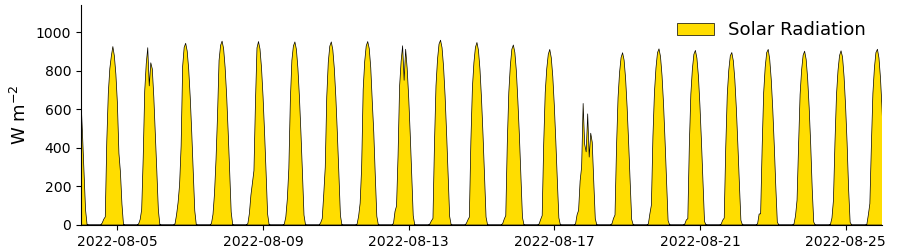

In [19]:
fig,ax=plt.subplots(figsize=(9,2.5))
fig.subplots_adjust(left=0.09,right=0.98,top=0.98,bottom=0.1)
ax.fill_between(cimisB.time, 0, cimisB.HlySolRad, color='#ffdd00', 
                ec='k',lw=0.5,label='Solar Radiation')
ax.axis(xmin=np.datetime64("2022-08-04"),xmax=np.datetime64("2022-08-26"),
        ymin=0)
ax.set_ylabel('W m$^{-2}$',fontsize=13)
ax.legend(loc='upper right',fontsize=13,frameon=0)
ax.spines['top'].set_visible(0)
ax.spines['right'].set_visible(0)

In [ ]:
# add new version of calcs using this radiation field.

mid_time=wse.time.values[:-1] + 0.5*np.diff(wse.time.values)

d_wse_dnum=utils.to_dnum(mid_time)

cimis_rad=utils.interp_near(mid_time,
                            cimis_ds.time.values, cimis_ds.HlySolRad.values,
                            max_dx=np.timedelta64(2,'h'))

# 0.5 m/h is an energetic tide. Call that the max.
ds=xr.Dataset()
ds['time']=('time',),mid_time
ds['obs_rad']=('time',),cimis_rad
ds['d_wse']=('time',),np.abs(d_wse)
ds['cimis_weighted']=(0.5-ds.d_wse).clip(0) * ds.obs_rad
obs_rad_weighted=ds.cimis_weighted
obs_rad_weighted.name=r"(1-$\eta_t$)rad$_{obs}$"

fig,axs=plt.subplots(3,1,sharex=True,figsize=(9,8))

def boxcar(da):
    return filters.lowpass_fir(da,window_of_opportunity,window='boxcar')

axs[0].plot(ds.time, ds.obs_rad,label='Obs. Solar Rad.')
agg_rad=boxcar(ds.obs_rad)
axs[0].plot(agg_rad.time, agg_rad,label='boxcar')
axs[1].plot(ds.time, ds.d_wse, label='|$\eta_t|$')
agg_d_wse=boxcar(ds.d_wse)
axs[1].plot(agg_d_wse.time,agg_d_wse,label='boxcar')

axs[2].plot(obs_rad_weighted.time, obs_rad_weighted, label=obs_rad_weighted.name)
agg_metric = boxcar(obs_rad_weighted)
axs[2].plot( agg_metric.time, agg_metric, label='boxcar')
lkw=dict(loc='upper left',bbox_to_anchor=[1,1],frameon=0)
[ax.legend(**lkw) for ax in axs]

axs[0].axis( xmin=np.datetime64("2022-07-25"),
             xmax=np.datetime64("2022-08-20") )
axs[0].axis(ymin=-10,ymax=1000)
axs[1].axis(ymin=0.0,ymax=0.6)
axs[2].axis(ymin=0.0)

fig.autofmt_xdate()
fig.subplots_adjust(top=0.95,right=0.8,left=0.1,bottom=0.11)

In [ ]:
metric_cdfs(obs_rad_weighted,bloom_start=np.datetime64("2022-08-08"),
            show_unfiltered=True)

Tides vs Insolation for Key Bloom Periods
--

In [ ]:
noaa_alameda

In [1]:
# mimic the filled insolation / tides overlay plot
import matplotlib.dates as mdates
ts_fig_dir = 'tide_and_solar'
if not os.path.exists(ts_fig_dir): os.makedirs(ts_fig_dir)

# PDT
periods = [
    [np.datetime64("2022-08-01"), np.datetime64("2022-09-01") ],
    [np.datetime64("2022-07-01"), np.datetime64("2022-10-01") ],
    [np.datetime64("2023-07-01"), np.datetime64("2023-10-01") ],
    [np.datetime64("2004-07-01"), np.datetime64("2004-10-01") ],
    
]

t_off = np.timedelta64(7,'h')

for period in periods:
    tide_sel = (noaa_alameda.time-t_off>=period[0]) & (noaa_alameda.time-t_off<=period[1])
    tides = noaa_alameda.isel(station=0,time=tide_sel)
    
    fig,ax_t=plt.subplots(figsize=(11.0,2))
    ax_d=ax_t.twinx()
    ax_d.plot(tides.time - t_off, tides.water_level,lw=1.0)
    ax_d.yaxis.set_visible(0)
    
    solar_sel = (cimis_ds.time-t_off>=period[0]) & (cimis_ds.time-t_off<=period[1])
    solar = cimis_ds['HlySolRad'].isel(time=solar_sel) 
    ax_t.fill_between(solar.time - t_off, solar, zorder=-1,color='#dede00')
    ax_t.plot(solar.time - t_off, solar, zorder=-0.5,color='#cccc00',lw=0.5) # add a bit of pop
    
    ax_t.axis(ymin=0)
    ax_t.yaxis.set_visible(0)
        
    #fig.autofmt_xdate()
    #plt.setp(ax_t.get_xticklabels(),rotation=90)
    locator = mdates.AutoDateLocator(minticks=10, maxticks=15)
    formatter = mdates.ConciseDateFormatter(locator)
    ax_t.xaxis.set_major_locator(locator)
    ax_t.xaxis.set_major_formatter(formatter)
    
    fig.subplots_adjust(top=0.99,right=0.98,left=0.03,bottom=0.4)
    ax_t.set_xlim(period)

    period_s = [utils.strftime(p,"%Y%m%d") for p in period]
    img_fn = f"{ts_fig_dir}/tide_and_solar-{period_s[0]}-{period_s[1]}.png"
    fig.savefig(img_fn,dpi=200)

NameError: name 'os' is not defined

Turbidity
--

In [53]:
# Similar but with SSC.
from stompy.io.local import usgs_nwis
alcatraz_id=374938122251801

alcatraz=usgs_nwis.nwis_dataset(alcatraz_id,
                                start_date=np.datetime64("2010-10-01"),
                                end_date=np.datetime64("2022-10-01"),
                                products=[63680], # Turbidity, FNU.
                                cache_dir='cache')


<IPython.core.display.Javascript object>


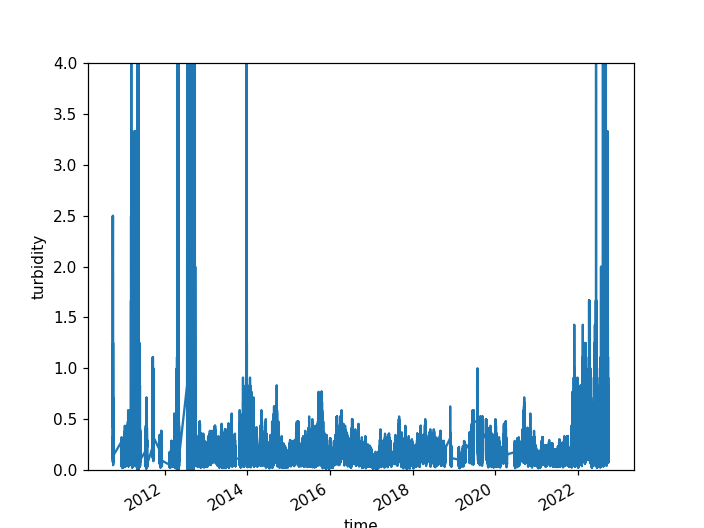

(14663.964583333334, 19482.743749999998, 0.0, 4.0)

In [54]:
fig,ax=plt.subplots()
(1./alcatraz['turbidity']).plot()
ax.axis(ymin=0,ymax=4)

previous month: 0.0 percentile


<IPython.core.display.Javascript object>


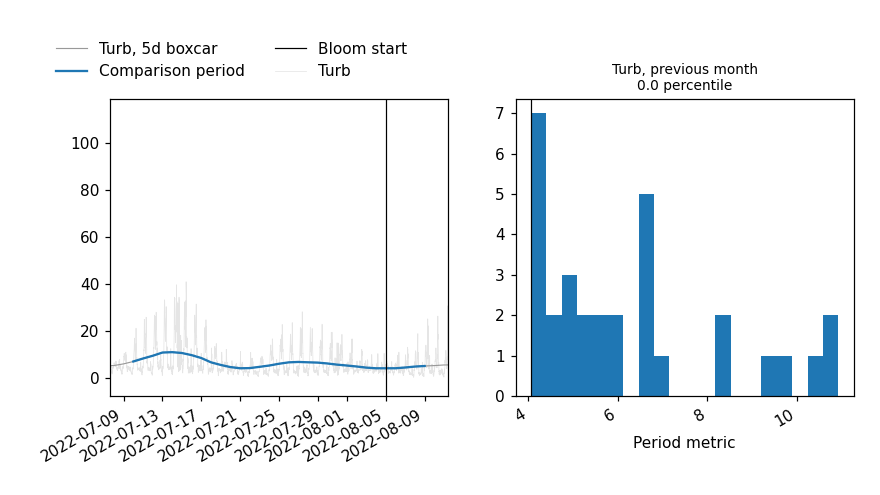

previous 2 months: 3.8 percentile


<IPython.core.display.Javascript object>


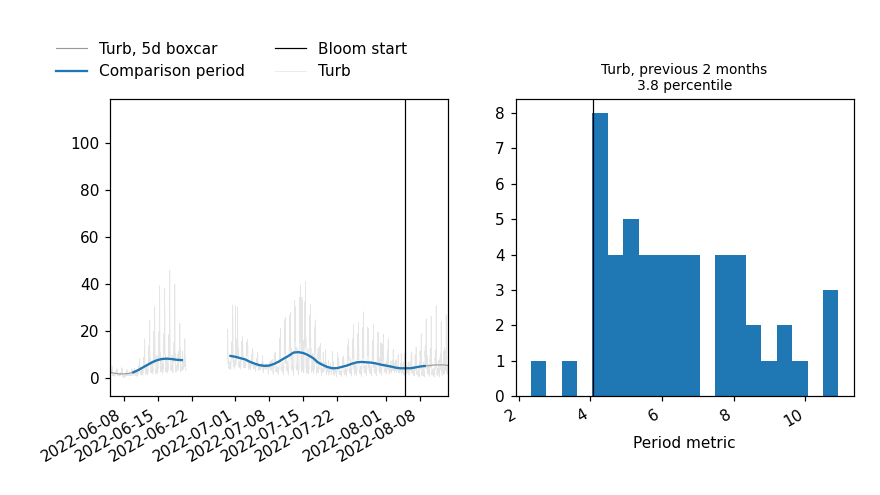

July-Aug yearly: 9.8 percentile


<IPython.core.display.Javascript object>


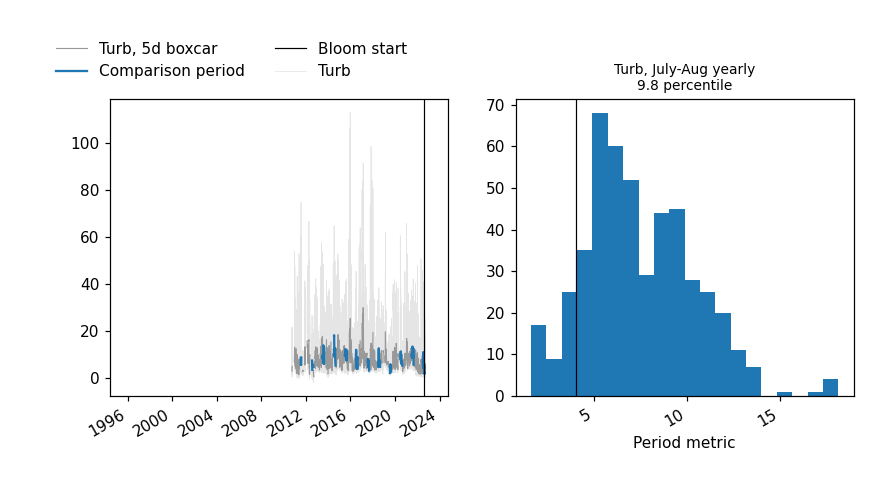

[<Figure size 800x450 with 2 Axes>,
 <Figure size 800x450 with 2 Axes>,
 <Figure size 800x450 with 2 Axes>]

In [56]:
# Get turbidity onto the rms_tide timeline
turb_orig=alcatraz['turbidity']
turb=utils.interp_near(rms_tide.time,
                       turb_orig.time.values, turb_orig.values,
                       max_dx=np.timedelta64(2,'h'))
ds=xr.Dataset()
ds['time']=rms_tide.time
ds['Turb']=('time',),turb

metric_cdfs(ds['Turb'],
            bloom_start=np.datetime64("2022-08-05"),
            show_unfiltered=True)

previous month: 3.2 percentile


<IPython.core.display.Javascript object>


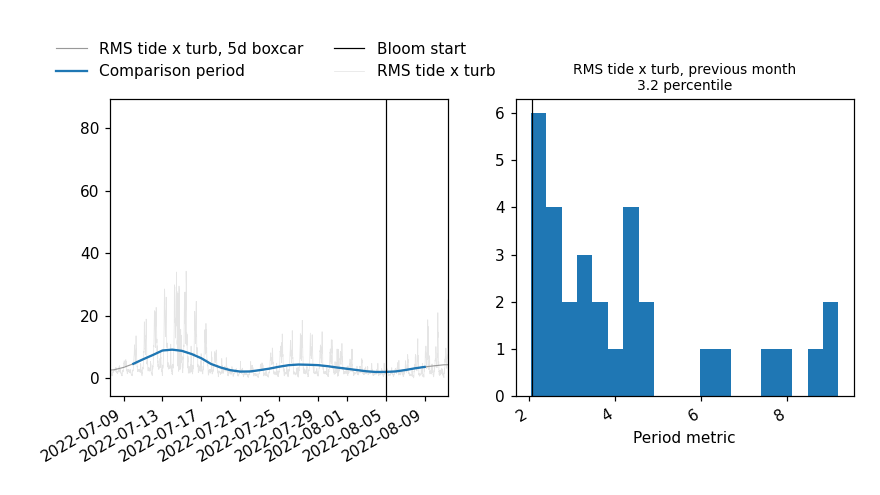

previous 2 months: 3.8 percentile


<IPython.core.display.Javascript object>


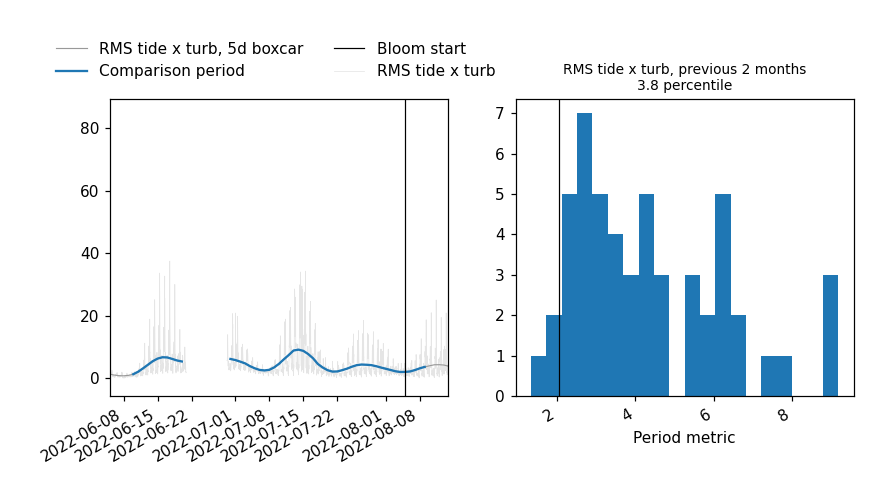

July-Aug yearly: 8.5 percentile


<IPython.core.display.Javascript object>


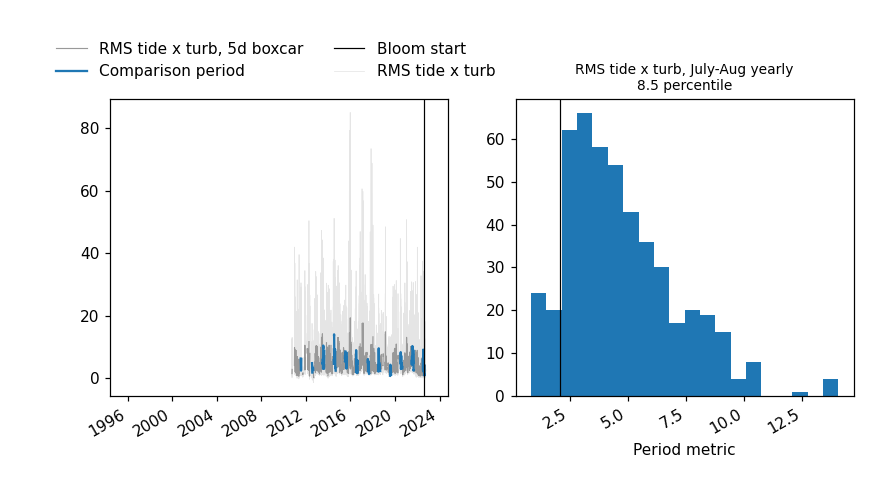

[<Figure size 800x450 with 2 Axes>,
 <Figure size 800x450 with 2 Axes>,
 <Figure size 800x450 with 2 Axes>]

In [58]:
# Combine spring-neap and turbidity

ds=xr.Dataset()
ds['time']=rms_tide.time
ds['Turb']=('time',),turb
ds['RMS tide']=rms_tide
ds['combined']=ds.Turb * ds['RMS tide']

da=ds.combined
da.name="RMS tide x turb"
metric_cdfs(da,
            bloom_start=np.datetime64("2022-08-05"),
            show_unfiltered=True)

In [59]:
alameda_regular

<xarray.Dataset>
Dimensions:            (time: 943776)
Coordinates:
  * time               (time) datetime64[ns] 1996-01-01 ... 2022-11-30T23:45:00
    station            <U7 '9414750'
Data variables:
    name               object 'Alameda'
    lat                float64 37.77
    lon                float64 -122.3
    water_level        (time) float64 0.08133 0.1215 0.172 ... 1.368 1.426 1.48
    wind_speed         (time) float64 nan nan nan nan nan ... nan nan nan nan
    wind_direction     (time) float64 nan nan nan nan nan ... nan nan nan nan
    wind_gust          (time) float64 nan nan nan nan nan ... nan nan nan nan
    water_temperature  (time) float64 12.7 nan nan nan 12.7 ... nan nan nan nan
    air_temperature    (time) float64 nan nan nan nan nan ... nan nan nan nan

previous month: 74.2 percentile


<IPython.core.display.Javascript object>


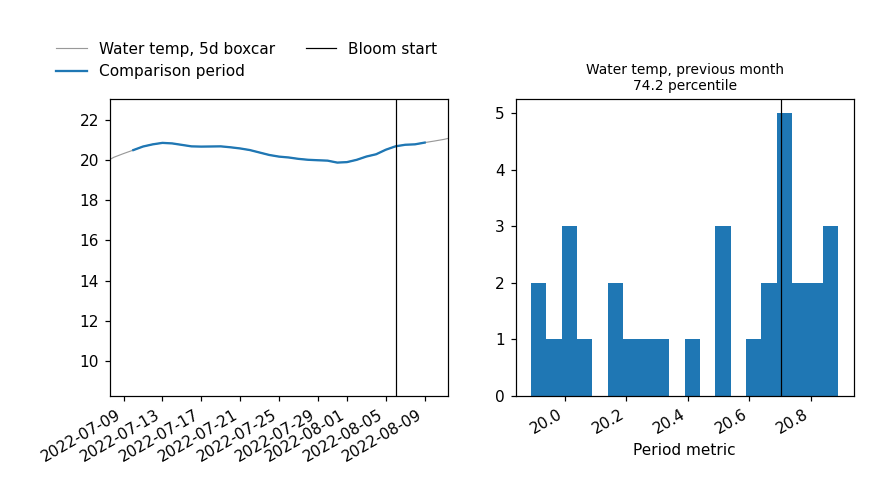

previous 2 months: 65.6 percentile


<IPython.core.display.Javascript object>


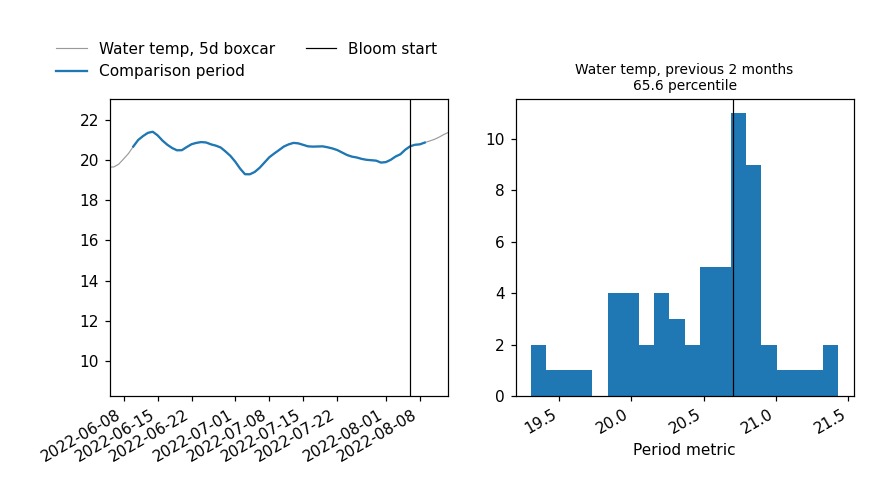

July-Aug yearly: 70.0 percentile


<IPython.core.display.Javascript object>


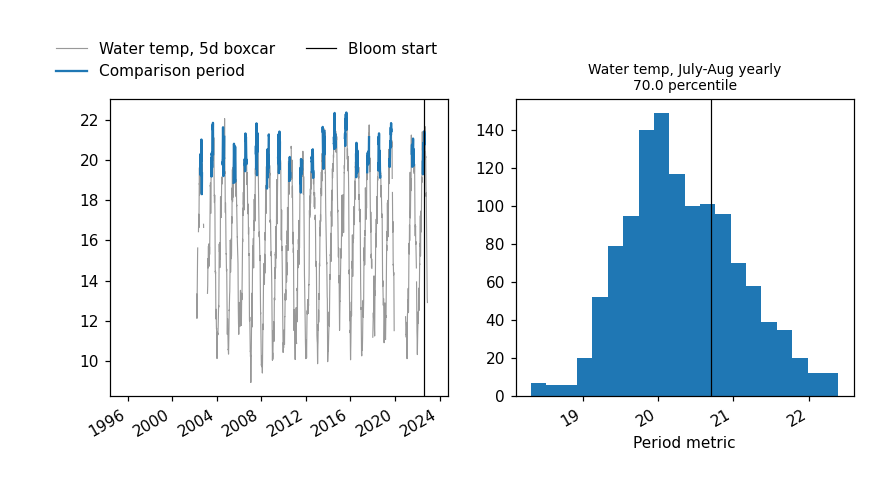

[<Figure size 800x450 with 2 Axes>,
 <Figure size 800x450 with 2 Axes>,
 <Figure size 800x450 with 2 Axes>]

In [64]:
# Temperature
metric_cdfs(alameda_regular['water_temperature'].rename('Water temp'),
            bloom_start=np.datetime64("2022-08-06"))

previous month: 87.1 percentile


<IPython.core.display.Javascript object>


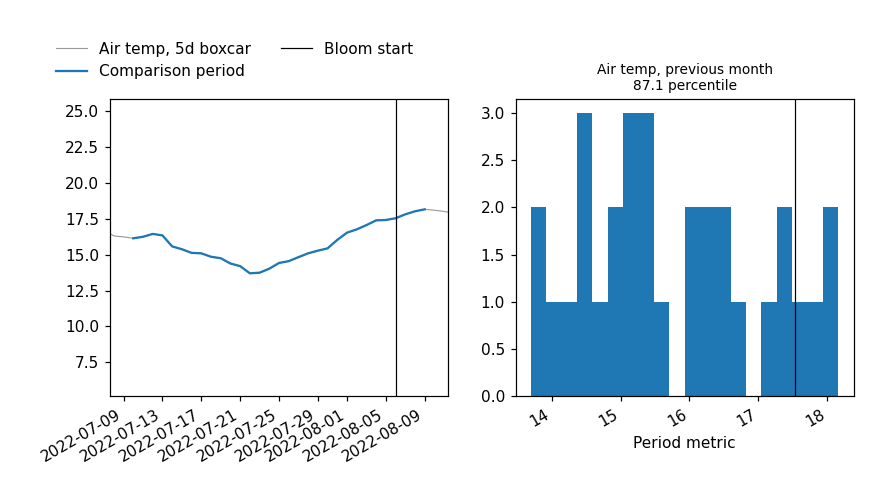

previous 2 months: 80.3 percentile


<IPython.core.display.Javascript object>


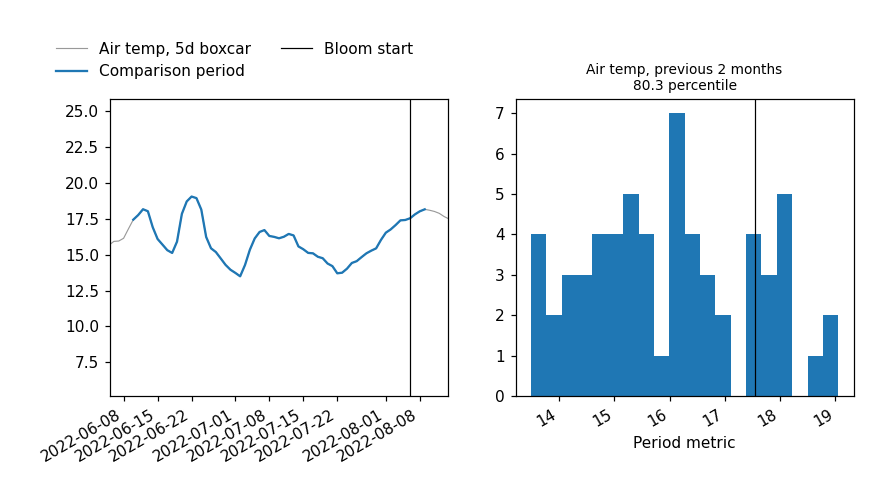

July-Aug yearly: 82.9 percentile


<IPython.core.display.Javascript object>


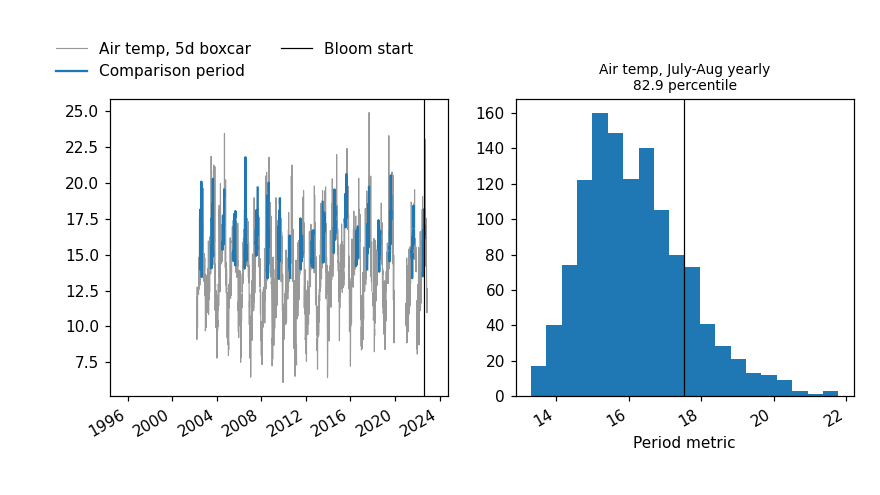

[<Figure size 800x450 with 2 Axes>,
 <Figure size 800x450 with 2 Axes>,
 <Figure size 800x450 with 2 Axes>]

In [65]:
# Temperature
metric_cdfs(alameda_regular['air_temperature'].rename('Air temp'),
            bloom_start=np.datetime64("2022-08-06"))

previous month: 96.8 percentile


/tmp/ipykernel_3679992/2983690357.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,axs=plt.subplots(1,2,figsize=(8,4.5))


<IPython.core.display.Javascript object>


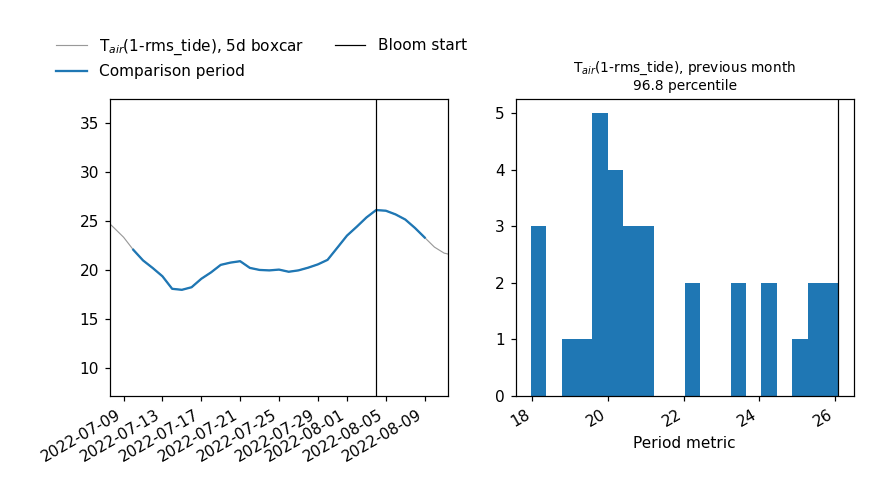

previous 2 months: 91.8 percentile


<IPython.core.display.Javascript object>


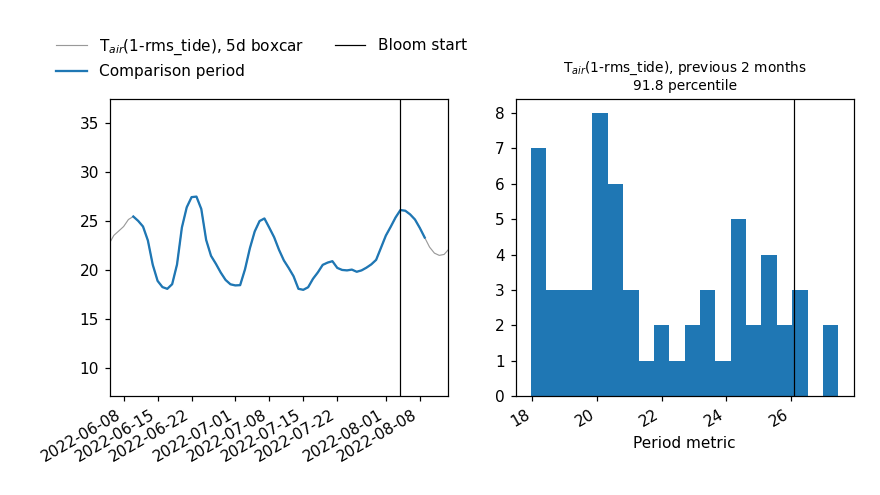

July-Aug yearly: 90.4 percentile


<IPython.core.display.Javascript object>


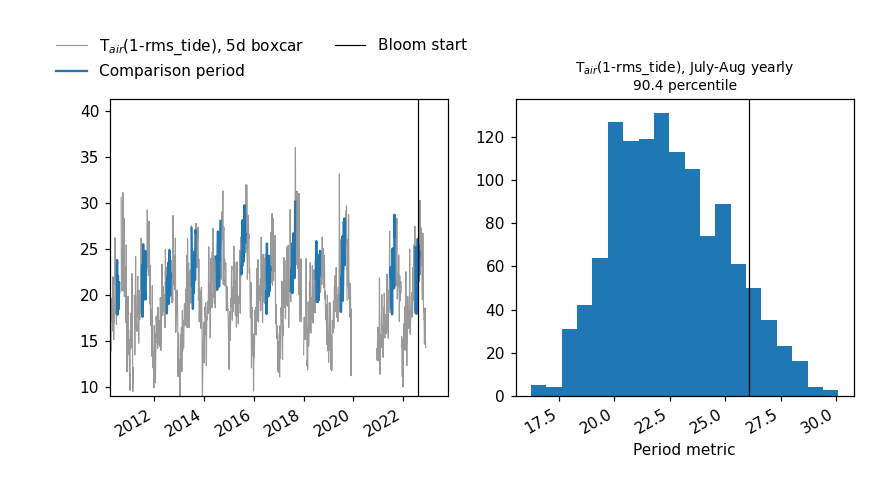

[<Figure size 800x450 with 2 Axes>,
 <Figure size 800x450 with 2 Axes>,
 <Figure size 800x450 with 2 Axes>]

In [69]:
# Air temperature and spring/neap
tide_and_temp=alameda_regular['air_temperature']*(2-rms_tide).clip(0)
tide_and_temp.name="T$_{air}$(1-rms_tide)"
metric_cdfs(tide_and_temp,
            bloom_start=np.datetime64("2022-08-04"))

previous month: 93.5 percentile


<IPython.core.display.Javascript object>


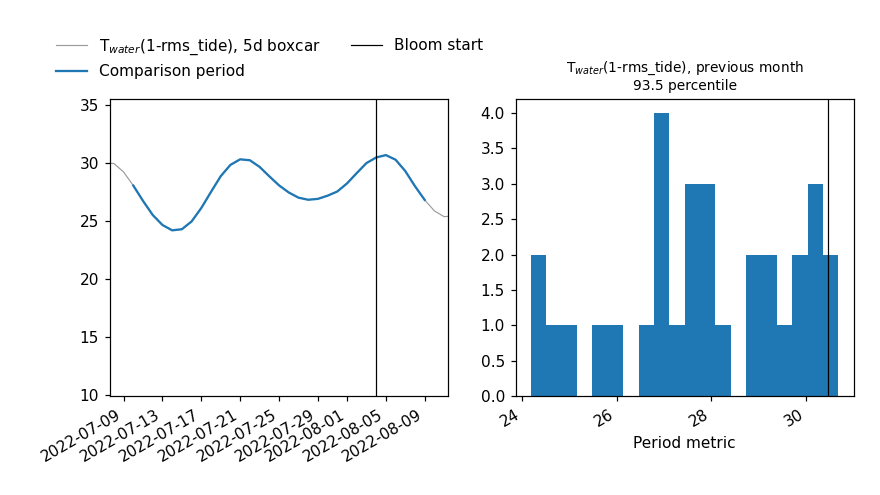

previous 2 months: 96.7 percentile


<IPython.core.display.Javascript object>


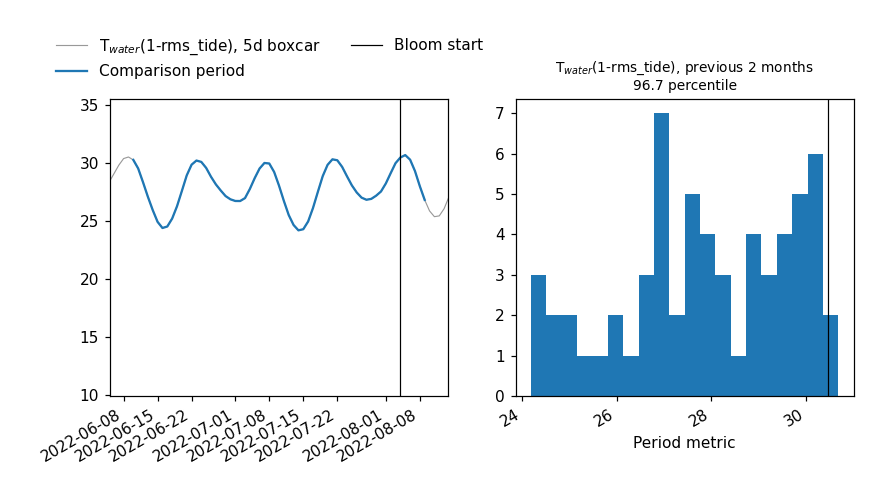

July-Aug yearly: 83.1 percentile


<IPython.core.display.Javascript object>


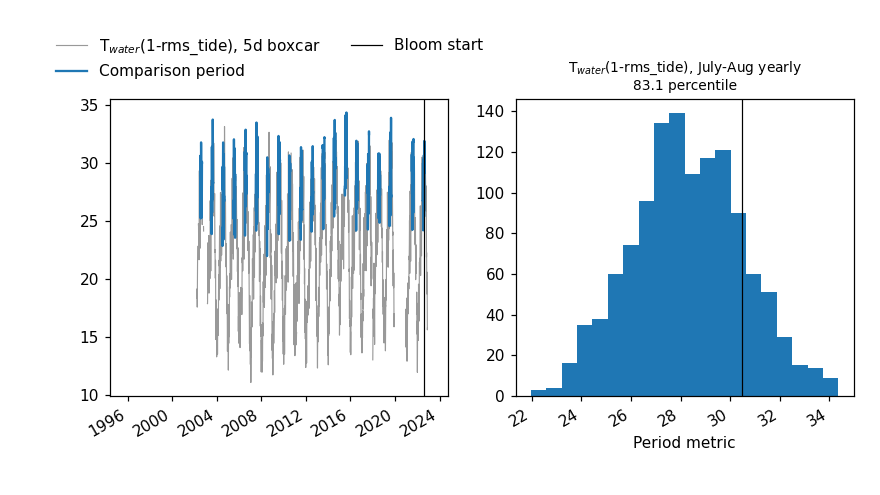

[<Figure size 800x450 with 2 Axes>,
 <Figure size 800x450 with 2 Axes>,
 <Figure size 800x450 with 2 Axes>]

In [67]:
# Water temperature and spring/neap
tide_and_temp=alameda_regular['water_temperature']*(2-rms_tide).clip(0)
tide_and_temp.name="T$_{water}$(1-rms_tide)"
metric_cdfs(tide_and_temp,
            bloom_start=np.datetime64("2022-08-04"))

Cloud Cover
==

 * Other CIMIS stations aside from Union City?
   * 171 Union City
   * 213 El Cerrito (active since 2013)
   * 254 Oakland Metro (active since 2018)
 * ASOS data from the airports?
   * 
NOAA forecasts
RS data (may be hard to get long time series)


In [ ]:
# CIMIS Web API is ostensibly documented at https://et.water.ca.gov/Rest/Index

# Suggests this should work:
# http://et.water.ca.gov/api/data?appKey=2cbd0eea-39b0-4e5d-9f05-f9bf1fd2e90d&targets=2,8,127&startDate=2010-01-01&endDate=2010-01-05

# Which it does...

# Can requests get that?
import requests

#req=requests.get("http://et.water.ca.gov/api/data?appKey=2cbd0eea-39b0-4e5d-9f05-f9bf1fd2e90d&targets=2,8,127&startDate=2010-01-01&endDate=2010-01-05")
req=requests.get("http://et.water.ca.gov/api/data?appKey=2cbd0eea-39b0-4e5d-9f05-f9bf1fd2e90d&targets=213&startDate=2018-12-25&endDate=2019-01-04&unitOfMeasure=M&dataItems=hly-air-tmp,hly-eto,hly-net-rad,hly-precip,hly-rel-hum,hly-res-wind,hly-sol-rad,hly-wind-dir,hly-wind-spd")

In [26]:
import six
six.moves.reload_module(cimis)

<module 'stompy.io.local.cimis' from '/richmondvol1/rusty/stompy/stompy/io/local/cimis.py'>

In [37]:
cimisC

<xarray.Dataset>
Dimensions:        (time: 33384)
Coordinates:
  * time           (time) datetime64[ns] 2018-12-25T09:00:00 ... 2022-10-16T0...
Data variables: (12/19)
    Date           (time) object '2018-12-25 0100' ... '2022-10-15 2400'
    HlyAirTmp      (time) float64 11.7 10.0 9.2 9.1 9.2 ... 16.6 16.5 16.4 16.5
    HlyAirTmp_qc   (time) object ' ' ' ' ' ' ' ' ' ' ' ' ... ' ' ' ' ' ' ' ' ' '
    HlyEto         (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.01 0.0 0.0 0.0 0.0
    HlyEto_qc      (time) object ' ' ' ' ' ' ' ' ' ' ' ' ... ' ' ' ' ' ' ' ' ' '
    HlyNetRad      (time) float64 -41.0 -41.0 -42.0 -42.0 ... -26.0 -26.0 -26.0
    ...             ...
    HlySolRad      (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    HlySolRad_qc   (time) object ' ' ' ' ' ' ' ' ' ' ' ' ... ' ' ' ' ' ' ' ' ' '
    HlyWindDir     (time) float64 282.0 324.0 322.0 306.0 ... 232.0 220.0 216.0
    HlyWindDir_qc  (time) object ' ' ' ' ' ' ' ' ' ' ' ' ... ' ' ' ' ' ' ' ' ' '
    HlyWindSpd     (time) float64 5.4 5.3 3.1 3.2 3.4 ... 2.8 2.5 2.4 2.5 2.0
    HlyWindSpd_qc  (time) object ' ' ' ' ' ' ' ' ' ' ' ' ... ' ' ' ' ' ' ' ' ' '
Attributes:
    data_owner:    water.ca.gov
    station_type:  station
    service_name:  cimis
    station_num:   254
    elevation:     14.0
    is_active:     True
    station_name:  Oakland Metro
    latitude:      37.718167
    longitude:     -122.197111

In [47]:
six.moves.reload_module(cimis)

<module 'stompy.io.local.cimis' from '/richmondvol1/rusty/stompy/stompy/io/local/cimis.py'>

In [48]:
fn="cimis_combined-20100101-20231001.nc"
if not os.path.exists(fn):
    dss=[]
    for station in [171,213,254]:
        ds=cimis.cimis_fetch_to_xr(stations=[station],
                                   start_date=np.datetime64("2010-01-01"),
                                   end_date = np.datetime64("2023-10-01"),
                                   cache_dir='cache',
                                   cimis_key=CIMIS_KEY)
        ds['station']=(),station
        ds['time']=ds['time']+np.timedelta64(8,'h') # to UTC
        dss.append(ds)
    cimis_combined = xr.concat(dss,dim='station')
    cimis_combined.to_netcdf(fn)
else:
    cimis_combined = xr.open_dataset(fn)

No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data


No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data


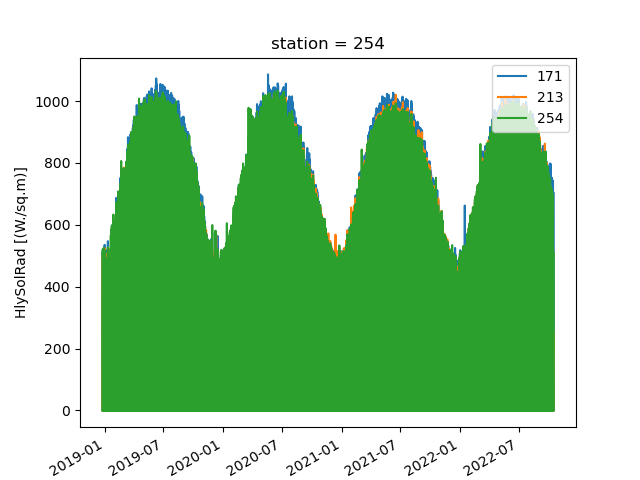

In [45]:
if 1:
    # plot, check overlap, make sure we're okay w.r.t. time zone.
    # All good.
    fig,ax=plt.subplots()
    for station_idx in range(3):
        station=cimis_combined.station[station_idx].item()
        cimis_combined['HlySolRad'].isel(station=station_idx).plot(ax=ax,
                                                                   label=station)
    ax.legend(loc='upper right')

In [58]:
# Daily average 
cimis_daily_rad = (cimis_combined['HlySolRad']
                   .resample(time="1D",origin=np.datetime64("2000-01-01 08:00"))
                   .mean())

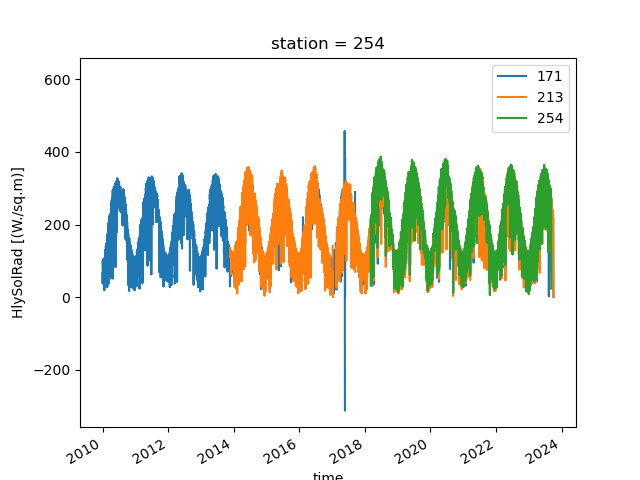

In [60]:
if 1:
    # Daily average
    fig,ax=plt.subplots()
    for station_idx in range(3):
        station=cimis_combined.station[station_idx].item()
        cimis_daily_rad.isel(station=station_idx).plot(ax=ax,
                                                       label=station)
    ax.legend(loc='upper right')


previous month: 25.8 percentile
previous 2 months: 23.0 percentile
July-Aug yearly: 50.1 percentile
previous month: 35.5 percentile
previous 2 months: 26.2 percentile
July-Aug yearly: 55.3 percentile
previous month: 41.9 percentile
previous 2 months: 32.8 percentile
July-Aug yearly: 49.7 percentile


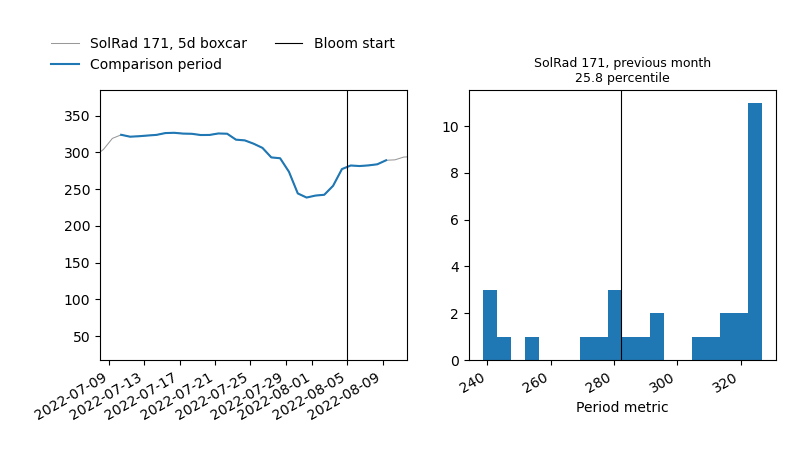

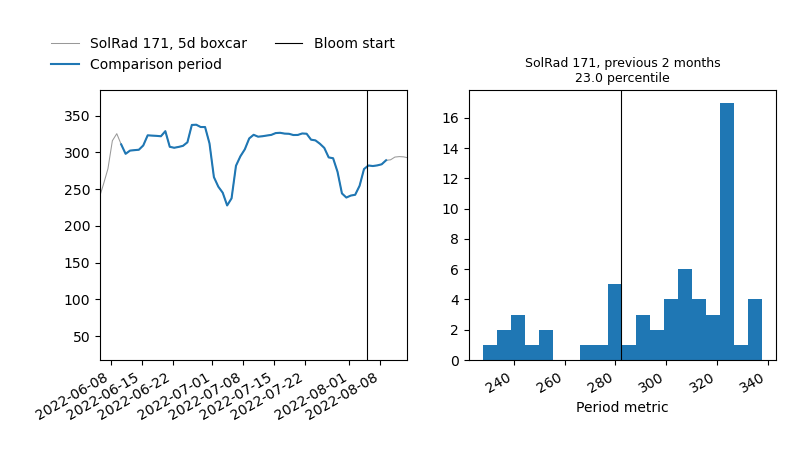

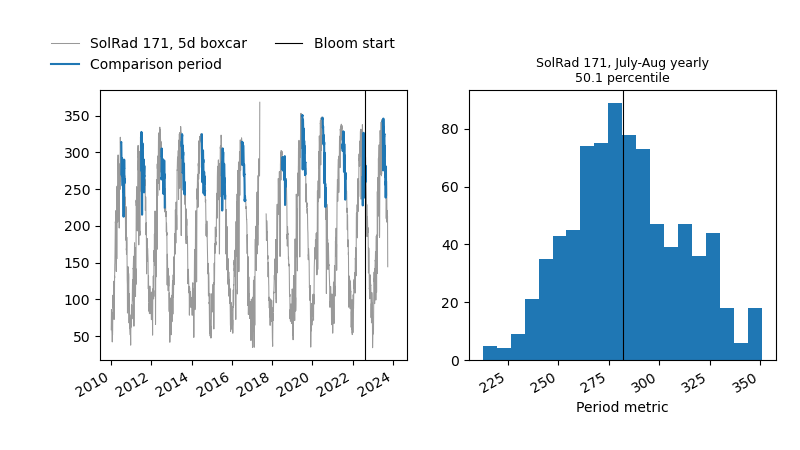

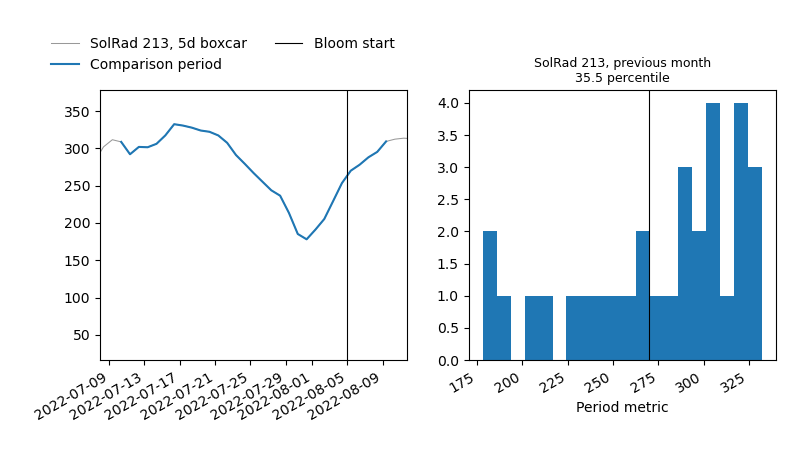

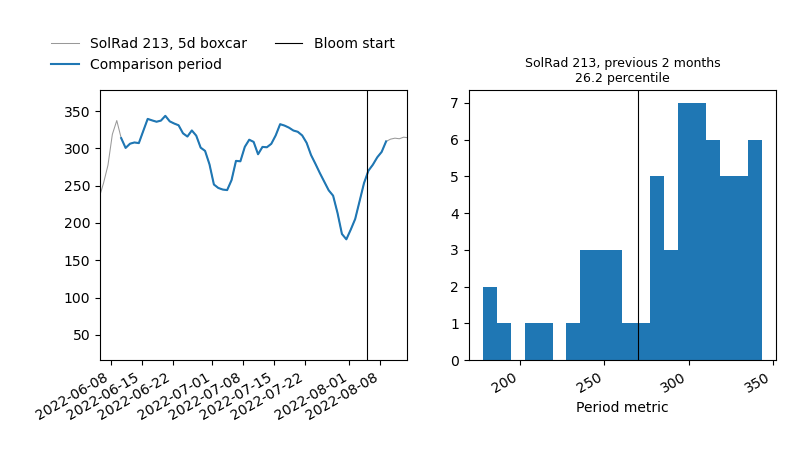

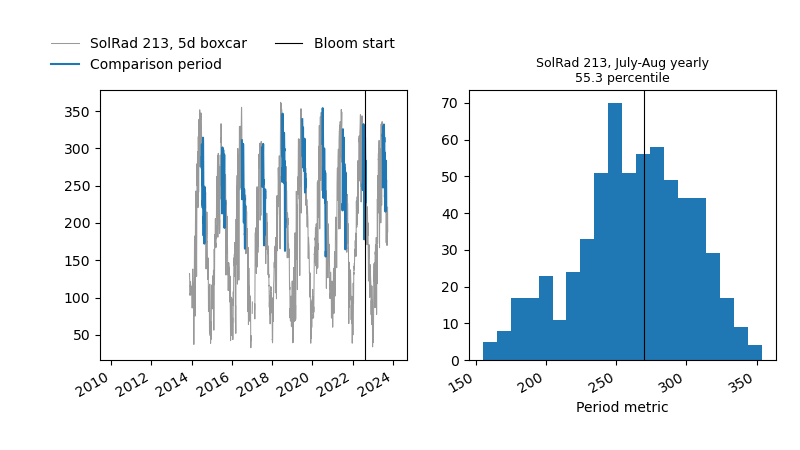

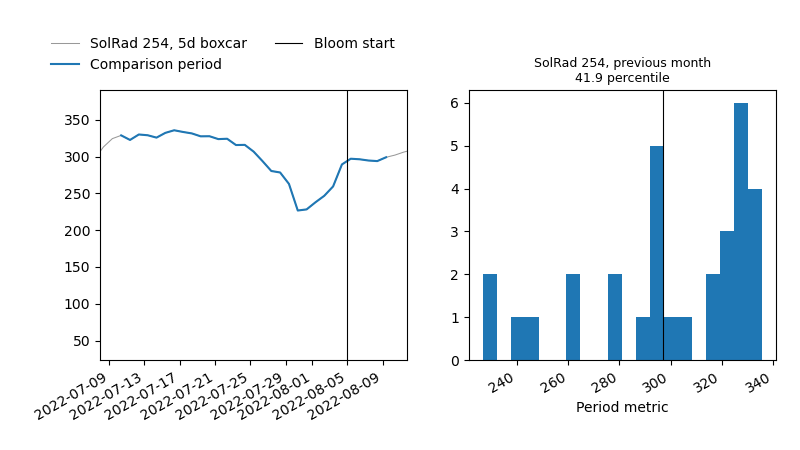

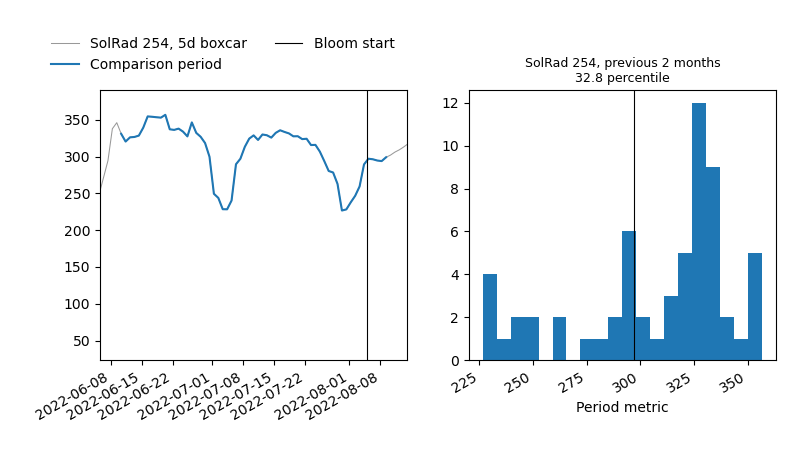

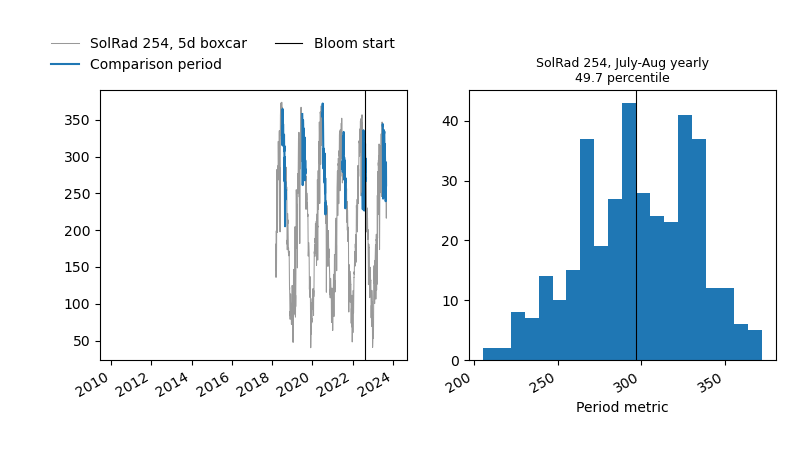

In [91]:

for station in [171,213,254]:
    sol_rad = cimis_combined['HlySolRad'].sel(station=station).to_dataframe()
    sol_rad_regular=sol_rad['HlySolRad'].resample('1H').mean()
    sol_rad_da=xr.DataArray(sol_rad_regular)
    sol_rad_da.name=f"SolRad {station}"
    metric_cdfs(sol_rad_da,bloom_start=np.datetime64("2022-08-05"))

In [256]:
# ASOS Data

import asos
df_oak=asos.fetch_asos("KOAK",np.datetime64("2005-07-01"),np.datetime64("2023-01-01")) # UTC

https://www.ncei.noaa.gov/data/automated-surface-observing-system-five-minute/access/2018/06/asos-5min-KOAK-201806.dat
HTTPError
https://www.ncei.noaa.gov/data/automated-surface-observing-system-five-minute/access/2018/07/asos-5min-KOAK-201807.dat
HTTPError


In [257]:
df_oak=df_oak.set_index('time')

In [258]:
df_oak['sol_rad'] = utils.ideal_solar_rad(df_oak.index.values)['sol_rad'].values
df_oak['sol_rad_cloud']=df_oak.sol_rad * (1-df_oak.cloudiness) # or literature relationship
oak_regular = df_oak['sol_rad_cloud'].resample('1H').mean()
da=xr.DataArray(oak_regular)
da.name="Cloudy Rad KOAK"
metric_cdfs(da,bloom_start=np.datetime64("2022-08-05"))


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

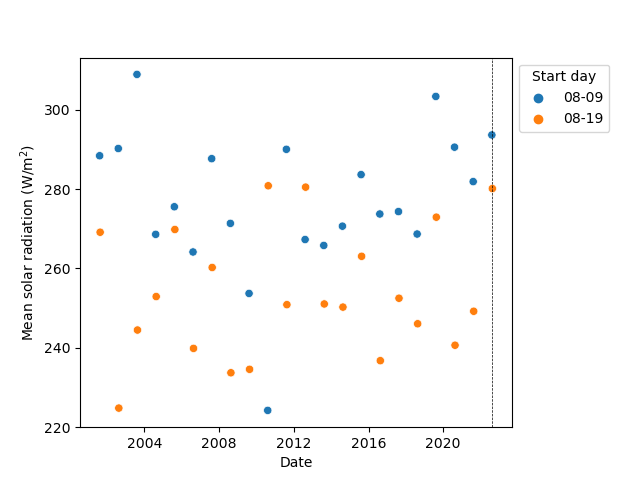

In [40]:
# Replicate Dave's analysis of CIMIS data

# First, the exact comparison he did:
# DS looked at Aug 9-16 and Aug 19-26, found 85th and 90th percentile across 2001-2021.
# Not worrying about the percentiles, visually looks reasonable.
recs=[]

for day_start,day_stop in [ ("08-09","08-16"),
                            ("08-19","08-26") ]:
    for year in range(2001,2023):
        t_start = np.datetime64(f"{year}-{day_start}")
        t_stop  = np.datetime64(f"{year}-{day_stop}")
        
        sel = (cimis_ds.time >= t_start) & (cimis_ds.time < t_stop)
    
        mean_rad = float(cimis_ds.HlySolRad.isel(time=sel).mean().values)
        recs.append( dict(t_start=t_start,t_stop=t_stop,mean_rad=mean_rad,
                         day_start=day_start,day_stop=day_stop))
    
df_5days= pd.DataFrame(recs)
df_5days['day_start']=df_5days['day_start'].astype("category")

import seaborn as sns
fig,ax=plt.subplots()
from stompy import utils
sns.scatterplot(df_5days,x='t_start',y='mean_rad', hue='day_start')
#ax.scatter(df_5days['t_start'],y=df_5days['mean_rad'])

ax.axvline(np.datetime64("2022-08-09"),color='k',ls="--",lw=0.5)
ax.legend(loc='upper left', bbox_to_anchor=(1,1),title="Start day")
ax.set_ylabel('Mean solar radiation (W/m$^2$)')
ax.set_xlabel("Date")
fig.subplots_adjust(right=0.8)

/tmp/ipykernel_2400207/660227516.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots()


Text(0.5, 0, 'Day of year')

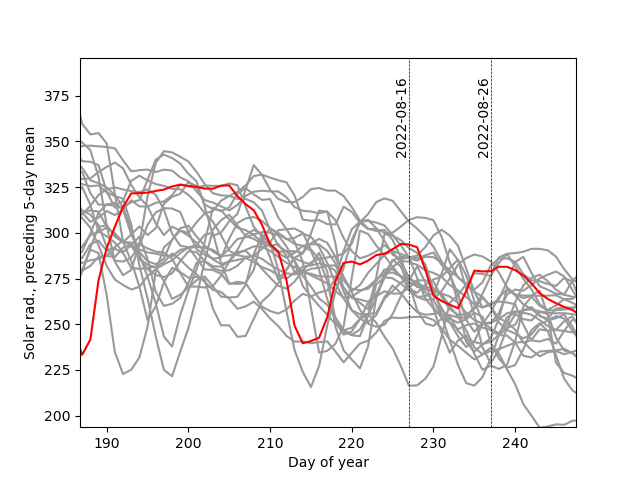

In [41]:
# Broader look - all 5 day averages.
rad_hourly = cimis_ds['HlySolRad'].to_dataframe()
# Center on midnight PST. Each point reflects the preceding 5 days.
rad_5day = rad_hourly.rolling("5D").mean().resample("24H",
                                                   offset=np.timedelta64(8,"h")
                                                   ).mean()

fig,ax=plt.subplots()

#rad_hourly.plot(ax=ax)
#rad_5day.plot(ax=ax)

for year in rad_5day.index.year.unique():
    sel=rad_5day.index.year==year
    if year==2022:
        col='r'
    else:
        col='0.6'
    df_sel=rad_5day[sel]
    ax.plot( df_sel.index.dayofyear, df_sel['HlySolRad'], color=col)

for end_5day in [np.datetime64("2022-08-16"),np.datetime64("2022-08-26")]:
    doy=(end_5day - np.datetime64("2022-01-01"))/ np.timedelta64(1,"D")
    ax.axvline(doy, color='k',lw=0.5,ls="--")
    ax.text(doy,0.95,str(end_5day),transform=ax.get_xaxis_transform(),rotation=90,ha='right',va='top')

ax.axis( (186.73, 247.448, 193.621, 395.91) )
ax.set_ylabel("Solar rad., preceding 5-day mean")
ax.set_xlabel("Day of year")


Mechanistic Solar Radiation + Tides
==

In [6]:
# Load harmonics, choose a location
harmonics = xr.open_dataset("../empirical_kd/Data_HydroHarmonics/harmonics-wy2013.nc")
grid_harmonics=unstructured_grid.UnstructuredGrid.read_ugrid(harmonics)

In [7]:
def get_local_tides(utm, time):
    c=grid_harmonics.select_cells_nearest(utm)
    omegas=harmonics.omegas.values
    # Don't really care about principal direction.
    # Model runs in UTC, so harmonics are referenced to UTC
    time_s = (time - harmonics.t_ref.values) / np.timedelta64(1,'s')

    h_comps = harmonics.stage_harmonics.isel(face=c)
    h_pred=harm_decomp.recompose(time_s,h_comps.values, omegas)
    
    u_comps = harmonics.u_harmonics.isel(face=c)
    u_pred=harm_decomp.recompose(time_s,u_comps.values, omegas)                                                                                                          

    v_comps = harmonics.v_harmonics.isel(face=c)
    v_pred=harm_decomp.recompose(time_s,v_comps.values, omegas)
    
    speed_pred=np.sqrt(u_pred**2 + v_pred**2)
    
    return h_pred, speed_pred             

(544437.0, 585003.0, 4155454.0, 4189217.0)

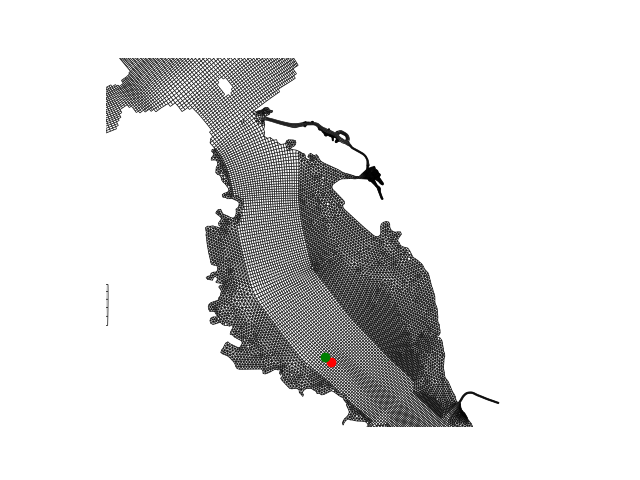

In [208]:
fig,ax=plt.subplots()
grid_harmonics.plot_edges(ax=ax,lw=0.5,color='k')
#pnt=[560450,4177960] # S of Alameda.
pnt=[565000, 4.16141e6] # time series extraction point in plot_transport_and_swimming. Near SMB
ax.plot(pnt[0],pnt[1],'ro')

ax.plot(564438., 4161870., 'go')
ax.axis( (544437, 585003, 4155454, 4189217) )
ax.axis('off')

In [56]:
# Closer look at DFM output -- how well are the harmonics doing?
# map output is 24h, not that useful.
import stompy.model.delft.dflow_model as dfm
dfm_rundir="/boisevol1/hpcshared/open_bay/hydro/full_res/wy2022_r52184/runs/wy2022_r52184"
model = dfm.DFlowModel.load(dfm_rundir)
hist_ds=model.his_dataset()

Yuck - duplicate source_sink names
Yuck - duplicate stations names


In [232]:
df=cimis_ds['HlySolRad'].to_dataframe()
#pnt=[560450,4177960]
# pnt=[565000, 4.16141e6]
pnt=[ 564438., 4161870.] # also SMB, but aligns with DFM history station.

# harmonic velocity
tide_h,tide_speed = get_local_tides(pnt,df.index.values)
df['tide_speed_harm']=tide_speed
df['tide_h_harm'] = tide_h

if 1: # DFM velocity when present
    hist_xy = np.c_[ hist_ds.station_x_coordinate.isel(time=0).values,
                     hist_ds.station_y_coordinate.isel(time=0).values]
    station_dist=utils.dist(pnt,hist_xy)
    station_idx = np.argmin(station_dist)
    # For the SMB point, this is fine -- 700m along channel..
    print(f"Point {pnt}: nearest station in history is {station_dist[station_idx]} m away, {hist_xy[station_idx]}")
    
    dfm_u=hist_ds.isel(stations=station_idx)['x_velocity'].mean(dim='laydim')
    dfm_v=hist_ds.isel(stations=station_idx)['y_velocity'].mean(dim='laydim')

    df_dfm = pd.DataFrame()
    df_dfm['time'] = hist_ds.time
    df_dfm['tide_u_dfm'] = dfm_u
    df_dfm['tide_v_dfm'] = dfm_v
    df_dfm['tide_speed_dfm'] = np.sqrt(dfm_u**2+dfm_v**2)
    df_dfm = df_dfm.set_index('time')
    for vname in ['tide_u_dfm','tide_v_dfm','tide_speed_dfm']:
        df[vname] = df_dfm[vname]

    df['tide_speed']=df['tide_speed_dfm'].combine_first(df['tide_speed_harm'])
else:
    df['tide_speed']=dfdf['tide_speed_harm']

Point [564438.0, 4161870.0]: nearest station in history is 0.0 m away, [ 564438. 4161870.]


In [22]:
if 0:# Confirm alignment
    fig,ax=plt.subplots()
    wse_regular = noaa_alameda['water_level'].isel(station=0).to_dataframe()['water_level'].resample('900s').mean()
    wse_regular.iloc[-6000:-4000].plot(label='NOAA')
    df['tide_h'].iloc[-400:].plot(label='Harmonic')
    ax.legend()

In [55]:
# Water column "model"
from stompy.model import water_column
import common
import six
six.moves.reload_module(water_column)
six.moves.reload_module(common)
six.moves.reload_module(utils)
from common import k_indef

class WaterColumn(water_column.WaterColumn):
    """
    Water column driven by time-varying tidal velocity
    """
    H=8 # depth of water column
    Cd=0.001
    ws=15.0 # upward swimming, m/d
    dz=0.2
    dt=np.timedelta64(900,'s')

    df=None # time-valued index, tide speed field, maybe others...
    speed_field='tide_speed' # field of df

    def __init__(self,**kw):
        utils.set_keywords(self,kw)
        self.init_state()

    def init_state(self):
        self.t0=self.df.index.values[0]
        self.data_t_s = (self.df.index.values - self.t0) / np.timedelta64(1,'s')
        self.data_u   = self.df[self.speed_field].values        
        super().init_state()
        
    def u_mag(self):
        return np.interp( self.t_s, self.data_t_s, self.data_u)

class GrowthColumn(WaterColumn):
    """
    Add solar radiation, Kd, and estimate of growth potential
    """
    sol_rad_field='HlySolRad'
    Gmax = 0.6 # "instantaneous" maximum growth rate, [d-1]
    
    Kd=2.5 # m-1
    Isat=40.0 # half-saturation light intensity

    def init_state(self):
        super().init_state()
        self.data_sol_rad=utils.fill_invalid(self.df[self.sol_rad_field].values.copy())
    def sol_rad(self):
        return np.interp(self.t_s, self.data_t_s, self.data_sol_rad)

    def growth_potential(self):
        """
        water-column averaged growth rate for current state
        """
        sol_rad = self.sol_rad()
        C_avg=self.C.mean()

        # z_int is positive up, and holds negative values, from -H to 0.
        klight_indef =k_indef(-self.z_int,self.Kd,sol_rad,self.Isat)
        # separate effects of tidal mixing, phase of tides w.r.t. daylight
        kfullsun_indef=k_indef(-self.z_int,self.Kd,1000,self.Isat)
        sol_rad_ideal = utils.ideal_solar_rad(self.t)
        kideal_indef  = k_indef(-self.z_int,self.Kd,sol_rad_ideal,self.Isat)
        sol_rad_diurnal = utils.ideal_solar_rad(self.t, declination=False)
        kdiurnal_indef  = k_indef(-self.z_int,self.Kd,sol_rad_diurnal,self.Isat)
    
        # Concentration weighted average
        # negate klight_indef because (-self.z_int) is descending.
        growth_avg=self.Gmax*np.sum(self.C*np.diff(-klight_indef)) / (self.H*C_avg)
        growth_fullsun = self.Gmax*np.sum(self.C*np.diff(-kfullsun_indef)) / (self.H*C_avg)
        growth_idealsun = self.Gmax*np.sum(self.C*np.diff(-kideal_indef)) / (self.H*C_avg)
        growth_diurnal = self.Gmax*np.sum(self.C*np.diff(-kdiurnal_indef)) / (self.H*C_avg)
        
        return dict(growth=growth_avg, growth_fullsun=growth_fullsun, growth_ideal=growth_idealsun, 
                    growth_diurnal=growth_diurnal)

    def compute_all_growth(self):
        """
        Integrate over the duration of self.df and populate self.df['growth']
        """
        self.t = self.t0
        self.spin()

        recs=[]
        
        times=self.df.index.values
        for i,t in utils.progress(enumerate(times),func=logging.warning):
            self.step_until(t)
            rec= self.growth_potential()
            rec['s_median'] = common.sigma_median(wc.C)
            rec['time'] = t
            recs.append(rec)
        df_output=pd.DataFrame(recs).set_index('time')

        for col in df_output.columns:
            self.df[col] = df_output[col]

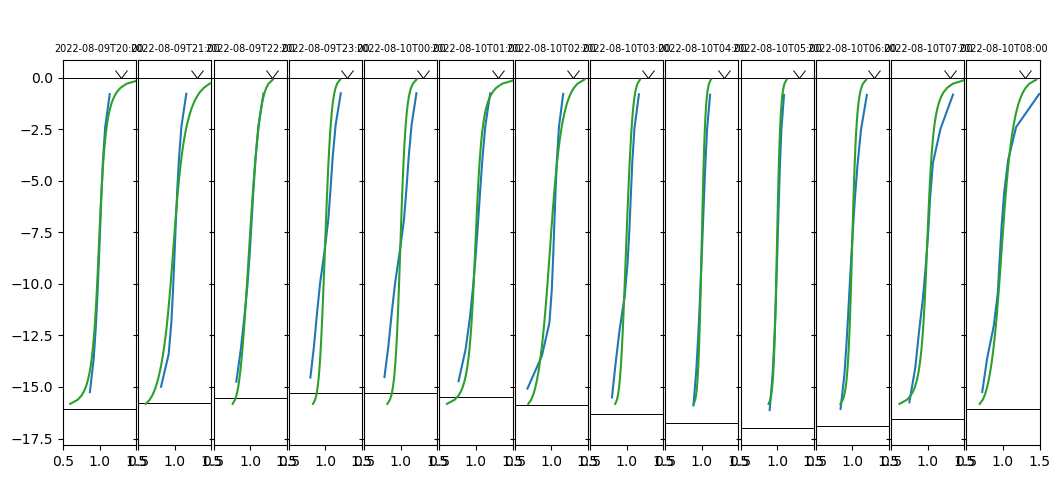

In [170]:
# Trying to replicate the DFM analysis.
# Snapshot output is 2022-08-09T20:30:00

# Load the DFM/DWAQ results
run_dir="run_wy2022_take2_common_20220801-v006"
swim_speeds=[0,5.0,15.0,30,50] # manually transcribed from the notebook with the run.
ds=xr.open_dataset(os.path.join(run_dir,"dwaq_map.nc"))
g=unstructured_grid.UnstructuredGrid.read_ugrid(ds)

# Choose a spot off SF for developing the growth potential:h
pnt=[565000, 4.16141e6] # SMB-ish
Isat=40.0

c=g.select_cells_nearest(p)
# scal='BLOOMAlg04' # 30 m/d. Erroneously labeled 15 m/d previously
scal='BLOOMAlg03' # 15 m/d.

#fig,(ax,axI,axG)=plt.subplots(1,3,sharey=True)

tidxs=np.arange(424,424+26,2)
fig,axs=plt.subplots(1,len(tidxs),sharey=True,figsize=(10.5,5))

for ax,tidx in zip(axs,tidxs):
    col=ds.isel(time=tidx,face=c)
    h_bot=col['LocalDepth'].values
    h_top=np.r_[0.0, h_bot[:-1]]
    h_int=np.r_[0.0, h_bot]
    h_mid=0.5*(h_bot+h_top)
    H=float(col['TotalDepth'].mean())

    C=col[scal].values
    C=C / C.mean()

    if 1:
        ax.plot(C,-h_mid,label=scal)
        ax.axhline(0.0,color='k',lw=0.7)
        ax.axhline(-H,color='k',lw=0.7)
        ax.plot(0.8,0.0,marker=7,ms=8,mew=0.7,mfc='none',mec='k',
               transform=ax.get_yaxis_transform())
        
        #axI.semilogx(col['RadBot'],-h_bot,label='RadBot')
        #axI.semilogx(col['Rad'],-h_top,ls='--',label='Rad')
        
        # manually discretized light curve
        #RadSurf=float(col['RadSurf'].mean())
        #axI.axvline( RadSurf, color='r', label='RadSurf')
        #axI.axvline( Isat, color='r',ls='--',label='Isat')
        
        #extVl = float(col['ExtVl'].mean())
        #depth=np.linspace(0,H,100)
        #axI.semilogx(RadSurf*np.exp(-depth*extVl),-depth,label='I(z)')
        
        #axI.set_xlabel("W/m$^2$")
        #ax.legend(loc='upper left')
        #axI.legend(loc='upper left')
        
        # Solve the growth exactly, so we don't have to worry about interference
        # from depth variation.
        #  col[scal]: concentration
        C_avg=float(col[scal].mean())
        G0=wc.Gmax
        
        klight_indef=k_indef(h_int,extVl,RadSurf,40.0)
        seg_klight=G0*np.diff(klight_indef) / np.diff(h_int)
        #axG.plot( seg_klight, -h_mid,'b-o',label='Light limitation')
        #axG.axis(xmin=0,xmax=G0)
        #axG.set_xlabel('Growth (day$^{-1}$)')
        # Concentration weighted average
        growth_avg=G0*np.sum(col[scal]*np.diff(klight_indef)) / (H*C_avg)
        #print(growth_avg)
        
        #axG.set_yticks(-h_int)
        #axG.grid(axis='y')
        #axI.grid(axis='y')
    
    
    if 1:
        df_time=df.index.values
        # Ending state should match
        sel = (df_time > np.datetime64("2022-07-01") ) & (df_time < col.time.values)
        # In spot check, Cd=0.0008 gave good agreement between vertical distributions.
        wc=GrowthColumn(df=df[ sel  ].copy(),
                        H=15.92,Cd=0.0008,ws=15.0, Kd=1.75)
        wc.compute_all_growth()
        wc.plot(ax=ax) 

    ax.axis(xmin=0.5,xmax=1.5)
    ax.set_title(col.time.values.astype('M8[m]'),fontsize=7)

fig.subplots_adjust(left=0.06,right=0.99,wspace=0.03)

In [226]:
df_time=df.index.values
sel = (df_time > np.datetime64("2022-06-01")) & (df_time<np.datetime64("2022-09-10"))
wc=GrowthColumn(df=df[sel].copy(), H=15.0, Cd=0.0008,ws=15.0, Kd=2.25)
wc.compute_all_growth()

(460860.982, 461687.949, -0.0206, 0.30109)

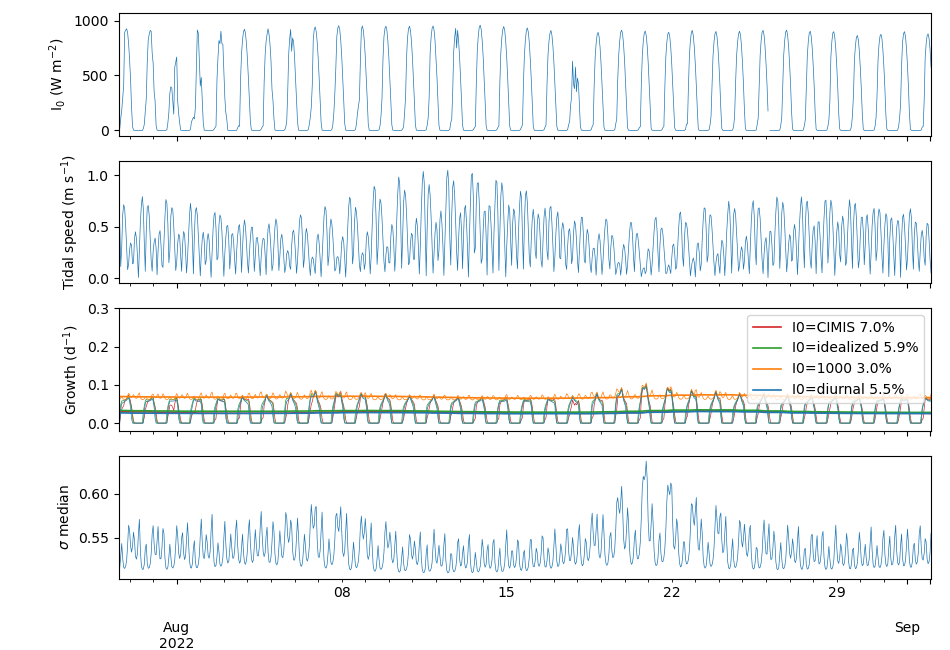

In [227]:
fig,axs=plt.subplots(4,1,sharex=True,figsize=(9.5,6.5))
df_sel=wc.df

kw=dict(lw=0.5)
df_sel['HlySolRad'].plot(ax=axs[0],**kw)
df_sel['tide_speed'].plot(ax=axs[1],**kw)
df_sel['s_median'].plot(ax=axs[3],**kw)

t=df_sel.index.values
colors=['tab:blue','tab:orange','tab:green', 'tab:red']
for field,label in [ ('growth','I0=CIMIS'),
                     ('growth_ideal','I0=idealized'),
                     ('growth_fullsun','I0=1000'),
                     ('growth_diurnal','I0=diurnal'),
                   ]:
    col=colors.pop()
    df_sel[field].plot(ax=axs[2], label='__none__', color=col,**kw)
    rolling_mean=df_sel[field].rolling('5D').mean()
    rolling_mean = rolling_mean[ rolling_mean.index.values > wc.t0+np.timedelta64(30,'D') ]
    pct_variation = rolling_mean.std() / rolling_mean.mean()
    rolling_mean.plot(ax=axs[2], color=col, lw=1.2, label=f"{label} {pct_variation*100:0.1f}%")

axs[0].set_ylabel('I$_0$ (W m$^{-2})$')
axs[1].set_ylabel('Tidal speed (m s$^{-1}$)')
axs[2].set_ylabel('Growth (d$^{-1}$)')
axs[3].set_ylabel(r'$\sigma$ median')

axs[2].legend(loc='upper right')
axs[2].set_xlabel(None)
fig.subplots_adjust(top=0.98,right=0.98)
axs[2].axis( (460860.982, 461687.949, -0.0206, 0.30109))

(19211.041, 19217.381, -0.05773, 1.25)

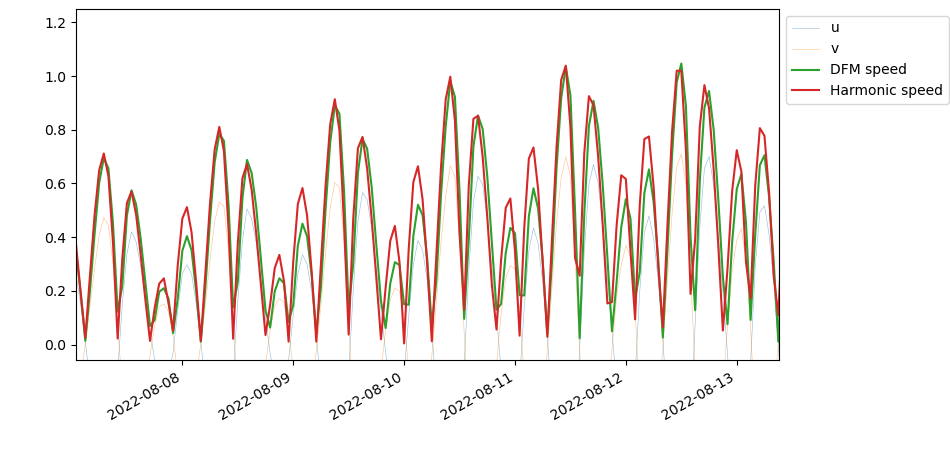

In [236]:
fig,ax=plt.subplots(figsize=(9.5,4.5))

ax.plot(hist_ds.time, dfm_u.values, label='u', lw=0.4,alpha=0.5)
ax.plot(hist_ds.time, dfm_v.values, label='v', lw=0.4,alpha=0.5)
ax.plot(hist_ds.time, np.sqrt(dfm_u**2+dfm_v**2), label='DFM speed')
ax.plot(wc.df.index.values, wc.df.tide_speed_harm,label='Harmonic speed')
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
fig.autofmt_xdate()
fig.subplots_adjust(left=0.08,right=0.82,top=0.98)
ax.axis( (19211.0410, 19217.381, -0.05773, 1.25) )

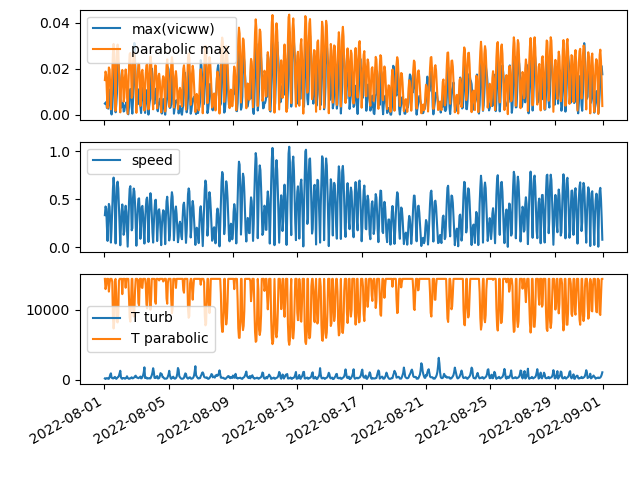

In [259]:
# Are vicww and u consistent in DFM?
time_sel = (hist_ds.time.values>np.datetime64("2022-08-01")) & (hist_ds.time.values<np.datetime64("2022-09-01"))
stn_ds = hist_ds.isel(stations=station_idx,time=time_sel)
u=stn_ds.x_velocity.mean(dim='laydim')
v=stn_ds.y_velocity.mean(dim='laydim')
speed = np.sqrt(u**2 + v**2)

fig,axs=plt.subplots(3,1,sharex=True)
axs[0].plot(stn_ds.time, stn_ds.vicww.max(dim='laydimw'), label="max(vicww)")
# what would that be if it's parabolic, kappa * u
# z/H
Cd=0.0008
u_star = np.sqrt(Cd)*speed 
axs[0].plot(stn_ds.time, 0.4 * u_star * 0.25 * stn_ds.waterdepth, label='parabolic max')

axs[1].plot(stn_ds.time, speed, label="speed")

if 0: # stratification?
    delta_s = stn_ds['salinity'].isel(laydim=0) - stn_ds['salinity'].isel(laydim=-1)
    axs[2].plot(stn_ds.time, delta_s, label=r'$\Delta$ salt')
if 1: # adjustment time?
    # Adjustment time scale based on turbulence quantities
    turb_t = stn_ds.tke.isel(laydimw=4).values / stn_ds.eps.isel(laydimw=4).values
    axs[2].plot(stn_ds.time, turb_t, label='T turb')
    # Adjustment time based on parabolic viscosity
    H = stn_ds.waterdepth
    eddy_para_max = 0.4 * u_star * 0.25 * H
    para_t = (H / (0.4 * 0.25 * u_star)).clip(0,4*3600)
    axs[2].plot(stn_ds.time, para_t, label='T parabolic')
    
for ax in axs:
    ax.legend()

fig.autofmt_xdate()
fig.subplots_adjust(right=0.98,top=0.98)

previous month: 22.6 percentile
previous 2 months: 19.7 percentile
July-Aug yearly: 47.9 percentile


[<Figure size 800x450 with 2 Axes>,
 <Figure size 800x450 with 2 Axes>,
 <Figure size 800x450 with 2 Axes>]

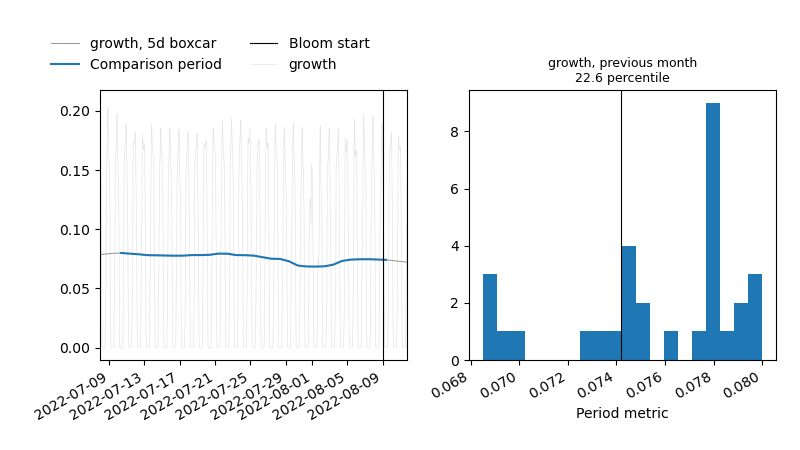

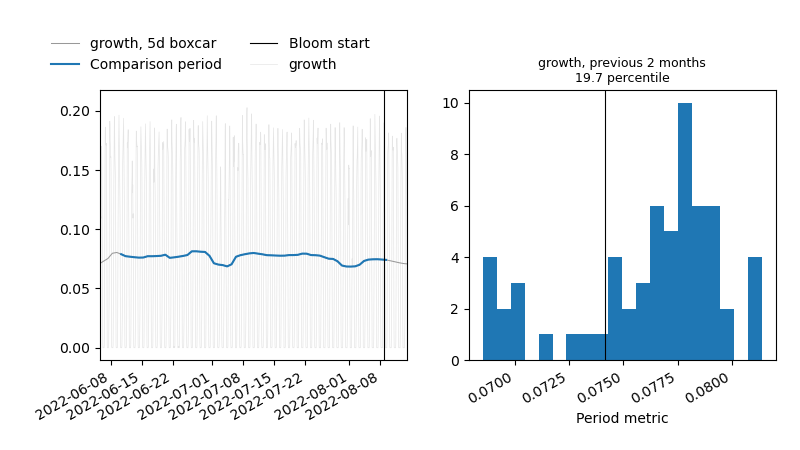

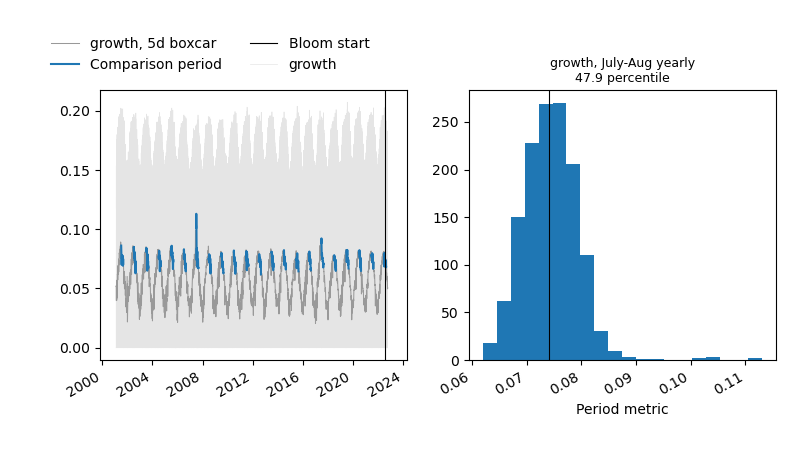

In [60]:
da=xr.DataArray(wc.df['growth'])
metric_cdfs(da,bloom_start=np.datetime64("2022-08-09"),
            show_unfiltered=True)

In [53]:
# Comparing DFM, water column, and GOTM
import six
from stompy import xr_utils
import subprocess
six.moves.reload_module(xr_utils)
import golumn
six.moves.reload_module(golumn)
six.moves.reload_module(utils)

<module 'stompy.utils' from '/richmondvol1/rusty/stompy/stompy/utils.py'>

In [57]:
# Tidal forcing:

glm = golumn.Golumn()
glm.fabm_yaml['instances']['sed']['parameters']['vertical_velocity'] = 15.0 # 15 m/d up 
glm.gotm_yaml['time']['start'] = datetime.datetime(2022,8,2,0,0)
glm.gotm_yaml['time']['stop' ] = datetime.datetime(2022,8,26,0,0)

if 0: # simple S2 tide in 8m
    glm.gotm_yaml['mimic_3d']['ext_pressure']['type'] = 'average_velocity'
    glm.gotm_yaml['mimic_3d']['ext_pressure']['dpdx']['method'] = 'tidal'
    glm.gotm_yaml['mimic_3d']['ext_pressure']['dpdx']['tidal'] = dict(amp_1=0.5,phase_1=0.0)
    glm.gotm_yaml['mimic_3d']['ext_pressure']['period_1'] = 43200 # S2
    glm.gotm_yaml['location']['depth']=8.0
else:
    # Try to match a DFM station
    time_sel = (hist_ds.time.values>np.datetime64("2022-08-01")) & (hist_ds.time.values<np.datetime64("2022-09-01"))
    stn_ds = hist_ds.isel(stations=station_idx,time=time_sel)
    u=stn_ds.x_velocity.mean(dim='laydim')
    v=stn_ds.y_velocity.mean(dim='laydim')
    glm.gotm_yaml['mimic_3d']['ext_pressure']['type'] = 'average_velocity'
    glm.gotm_yaml['mimic_3d']['ext_pressure']['dpdx']['method'] = 'file'
    glm.gotm_yaml['mimic_3d']['ext_pressure']['dpdy']['method'] = 'file'
    glm.gotm_yaml['mimic_3d']['ext_pressure']['dpdx']['file'] = glm.write_file(stn_ds.x_velocity.mean(dim='laydim'))                                                                                   
    glm.gotm_yaml['mimic_3d']['ext_pressure']['dpdy']['file'] = glm.write_file(stn_ds.y_velocity.mean(dim='laydim'))
    glm.gotm_yaml['location']['depth']=float(stn_ds.waterdepth.mean())
    if 1:
        salt=stn_ds.salinity
        salt['z'] = stn_ds.zcoordinate_c - stn_ds.waterlevel # Makes z relative to freesurface.
        glm.gotm_yaml['salinity']['method'] = 'file'
        glm.gotm_yaml['salinity']['file'] = glm.write_file(salt)
        glm.gotm_yaml['salinity']['relax']['tau']   = 1800 # Relax modeled salinity to DFM with time scale 0.5 h 
        glm.gotm_yaml['salinity']['relax']['tau_s'] = 1800 # 
        glm.gotm_yaml['salinity']['relax']['tau_b'] = 1800 # 

    if 1:
        temp=stn_ds.temperature
        temp['z'] = stn_ds.zcoordinate_c - stn_ds.waterlevel # Makes z relative to freesurface.
        glm.gotm_yaml['temperature']['method'] = 'file'
        glm.gotm_yaml['temperature']['file'] = glm.write_file(temp)
        glm.gotm_yaml['temperature']['relax']['tau']   = 1800 # Relax modeled salinity to DFM with time scale 0.5 h 
        glm.gotm_yaml['temperature']['relax']['tau_s'] = 1800 # 
        glm.gotm_yaml['temperature']['relax']['tau_b'] = 1800 # 

glm.gotm_yaml['output']['rouse']['time_step']=25 # 15 minutes 
glm.gotm_yaml['bottom']['h0b'] = 1e-5 # 1e-3 # 0.03
glm.run()

fig=glm.fig_time_z(['num','sed_c'],column=True)
fig.axes[1].collections[0].set_clim(0.8,1.2)

NameError: name 'station_idx' is not defined

(19205.283, 19211.9848)

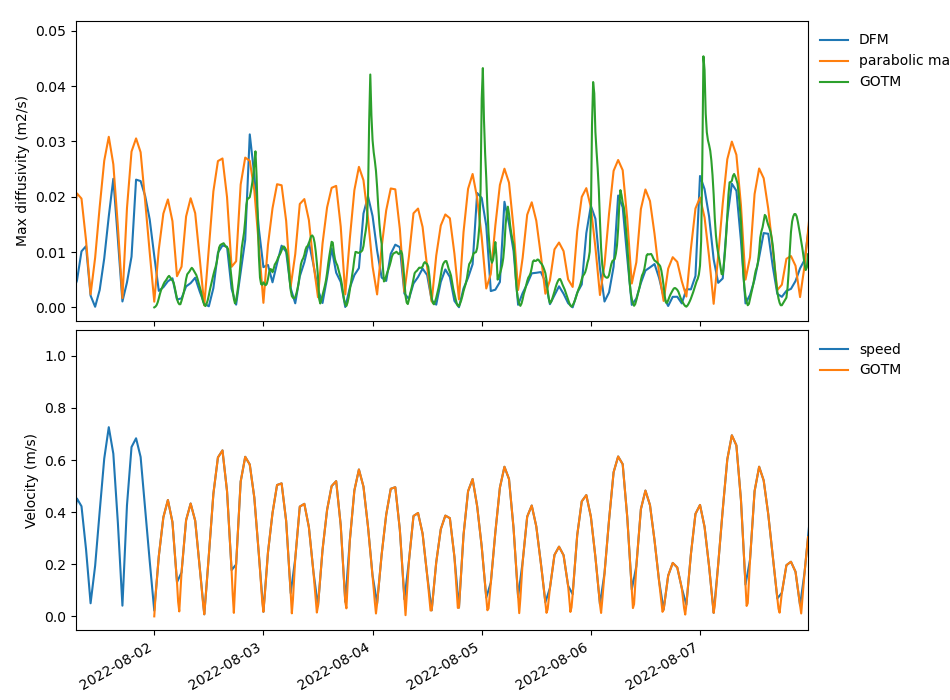

In [446]:
# Compare viscosity and velocity across GOTM, DFM and water column
time_sel = (hist_ds.time.values>np.datetime64("2022-08-01")) & (hist_ds.time.values<np.datetime64("2022-09-01"))
stn_ds = hist_ds.isel(stations=station_idx,time=time_sel)
u=stn_ds.x_velocity.mean(dim='laydim')
v=stn_ds.y_velocity.mean(dim='laydim')
speed = np.sqrt(u**2 + v**2)

fig,axs=plt.subplots(2,1,sharex=True,figsize=(9.5,7))
axs[0].plot(stn_ds.time, stn_ds.vicww.max(dim='laydimw'), label="DFM")
# what would that be if it's parabolic, kappa * u
Cd=0.0008
u_star = np.sqrt(Cd)*speed 
axs[0].plot(stn_ds.time, 0.4 * u_star * 0.25 * stn_ds.waterdepth, label='parabolic max')

axs[1].plot(stn_ds.time, speed, label="speed")

glm_speed = np.sqrt( glm.results.u.mean(dim='z')**2 + glm.results.v.mean(dim='z')**2 )
axs[1].plot(glm.results.time, glm_speed, label='GOTM')
axs[0].plot(glm.results.time, glm.results.nus.max(dim='zi'), label='GOTM')

axs[0].set_ylabel('Max diffusivity (m2/s)')
axs[1].set_ylabel('Velocity (m/s)')
for ax in axs:
    ax.legend(loc='upper left',bbox_to_anchor=(1,1),frameon=0)
fig.autofmt_xdate()
fig.subplots_adjust(right=0.85,top=0.97,left=0.08,bottom=0.10,hspace=0.03)
axs[0].set_xlim(19205.283, 19211.9848)

/tmp/ipykernel_2400207/613427262.py:8: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  coll = ax.pcolormesh( t, z , stn_ds.salinity, cmap='turbo')
/tmp/ipykernel_2400207/613427262.py:12: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  coll = ax.pcolormesh( t, z , stn_ds.vicww, cmap='turbo')


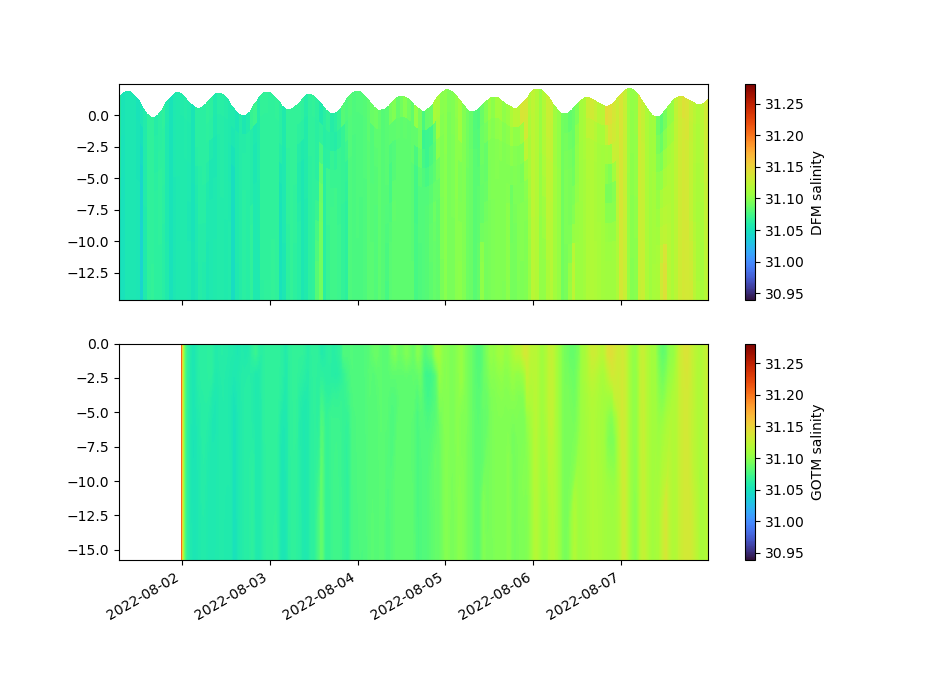

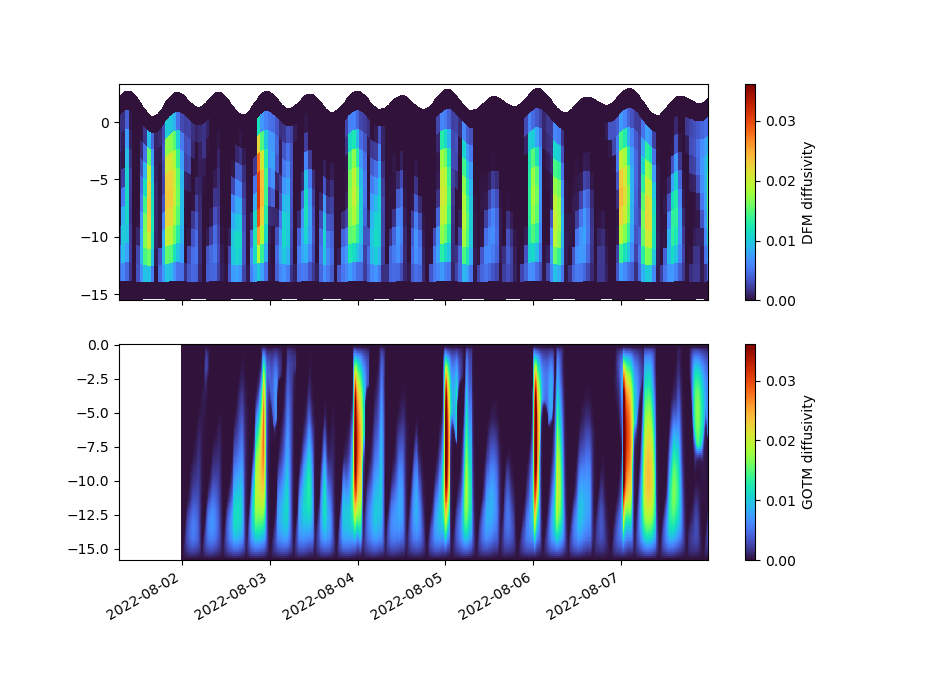

In [449]:

for field in ['salt','nus']:
    fig,axs=plt.subplots(2,1,sharex=True,figsize=(9.5,7))

    # Upper panel: DFM salt
    ax=axs[0]
    if field=='salt':
        t,z = xr.broadcast(stn_ds.time, stn_ds.zcoordinate_c)
        coll = ax.pcolormesh( t, z , stn_ds.salinity, cmap='turbo')
        plt.colorbar(coll,label='DFM salinity',ax=ax)
    elif field=='nus':
        t,z = xr.broadcast(stn_ds.time, stn_ds.zcoordinate_w)
        coll = ax.pcolormesh( t, z , stn_ds.vicww, cmap='turbo')
        plt.colorbar(coll,label='DFM diffusivity',ax=ax)
    
    # Lower panel: GOTM salt
    ax=axs[1]
    t,z = xr.broadcast(glm.results.time, glm.results.z_coord)
    if field=='salt':
        t,z = xr.broadcast(glm.results.time, glm.results.z_coord)
        coll = ax.pcolormesh( t,z, glm.results.salt, cmap='turbo', clim=coll.get_clim())
        plt.colorbar(coll,label='GOTM salinity',ax=ax)
    elif field=='nus':
        t,z = xr.broadcast(glm.results.time, glm.results.zi_coord)
        coll = ax.pcolormesh( t,z, glm.results.nus, cmap='turbo', clim=coll.get_clim())
        plt.colorbar(coll,label='GOTM diffusivity',ax=ax)
    
    fig.autofmt_xdate()
    axs[0].set_xlim(19205.283, 19211.9848)

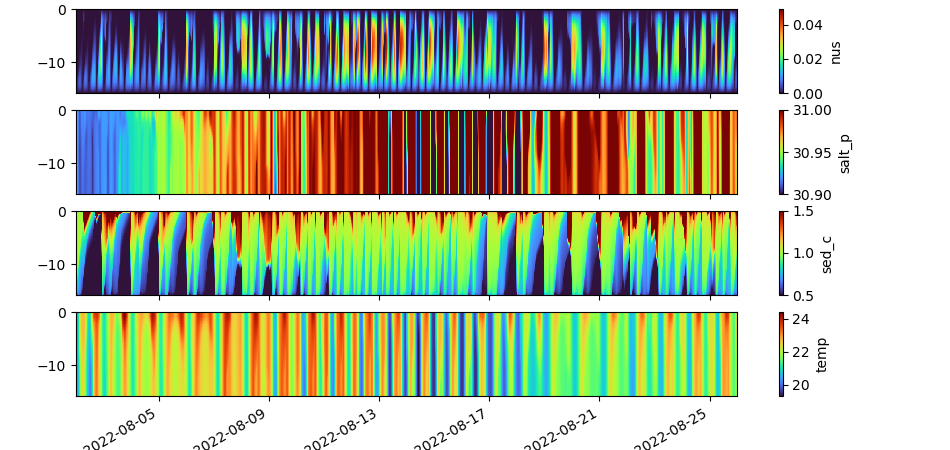

In [451]:
fig=glm.fig_time_z(['nus','salt_p','sed_c','temp'],column=True)
fig.axes[1].collections[0].set_clim(30.9,31.0)
fig.axes[2].collections[0].set_clim(0.5,1.5)


In [447]:
# pull from DWAQ run:
run_dir="run_wy2022_take2_common_20220801-v006"
ds=xr.open_dataset(os.path.join(run_dir,"dwaq_map.nc"))
g=unstructured_grid.UnstructuredGrid.read_ugrid(ds)
pnt=[stn_ds.station_x_coordinate.values[0], stn_ds.station_y_coordinate.values[0]] # SMB-ish
c=g.select_cells_nearest(p)
scal='BLOOMAlg03' # 15 m/d.
tidxs=np.arange(50,1400) 
recs=[]
for tidx in tidxs:
    col=ds.isel(time=tidx,face=c)
    C=col[scal].values
    rec=dict(time=col.time.values,
             sig_median=1.0 - common.sigma_median(C))
    recs.append(rec)
dwaq_df=pd.DataFrame(recs)

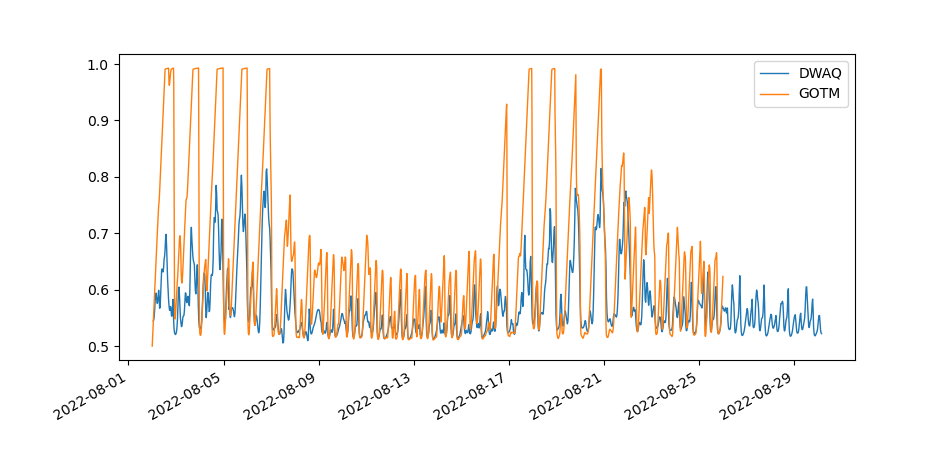

In [448]:
# And compare sigma_median
fig,ax=plt.subplots(figsize=(9.5,4.5))

gotm_sig_median = common.sigma_median(glm.results['sed_c'])

ax.plot(dwaq_df.time,dwaq_df.sig_median, lw=1, label='DWAQ')
ax.plot(glm.results.time, gotm_sig_median, lw=1, label='GOTM')
ax.legend(loc='upper right',bbox_to_anchor=(1,1))
fig.autofmt_xdate()

In [439]:
# zcoordinate_c is positive up according to DFM's netcdf output. 
# my code isn't doing anything odd with zcoordinate_c or zcoordinate_w
# it appears to be positive up, as advertised, and starts at the bed.
# zcoordinate_w is consistent with _c.
# salinity clearly unstable.
profile = stn_ds.sel(time=np.datetime64("2022-08-18 19:00"), method='nearest')
                     
profile

<xarray.Dataset>
Dimensions:                                       (laydim: 10, laydimw: 11,
                                                   cross_section: 22,
                                                   cross_section_pts: 11,
                                                   source_sink: 1,
                                                   source_sink_pts: 2)
Coordinates:
    station_x_coordinate                          float64 ...
    station_y_coordinate                          float64 ...
    station_name                                  |S64 b'P28'
    zcoordinate_c                                 (laydim) float64 ...
    zcoordinate_w                                 (laydimw) float64 ...
    cross_section_name                            (cross_section) |S64 b'Crs0...
    source_sink_name                              (source_sink) |S64 b''
    time                                          datetime64[ns] 2022-08-18T1...
  * cross_section                                 (cross_section) <U5 'Crs01'...
  * source_sink                                   (source_sink) <U1 ''
    stations                                      <U20 'P28'
Dimensions without coordinates: laydim, laydimw, cross_section_pts,
                                source_sink_pts
Data variables: (12/43)
    station_id                                    |S64 ...
    waterlevel                                    float64 ...
    waterdepth                                    float64 15.29
    x_velocity                                    (laydim) float64 -0.01511 ....
    y_velocity                                    (laydim) float64 -0.08181 ....
    z_velocity                                    (laydim) float64 ...
    ...                                            ...
    source_sink_prescribed_temperature_increment  (source_sink) float64 ...
    source_sink_current_discharge                 (source_sink) float64 ...
    source_sink_cumulative_volume                 (source_sink) float64 ...
    source_sink_discharge_average                 (source_sink) float64 ...
    timestep                                      float64 ...
    cross_section_geom                            (cross_section) object LINE...
Attributes:
    institution:    Deltares
    references:     http://www.deltares.nl
    source:         Deltares, D-Flow FM Version 1.1.254.000000, Nov 14 2017, ...
    history:        Created on 2023-07-04T23:27:52+0000, D-Flow FM
    date_created:   2023-07-04T23:27:52+0000
    date_modified:  2023-07-04T23:27:52+0000
    Conventions:    CF-1.5 Deltares-0.1

In [444]:
# DFM might think it's a temperature thing, though?
profile.temperature.values

array([21.32034421, 21.36470603, 21.45177784, 21.62773239, 21.86302066,
       22.11204039, 22.33621333, 22.56109145, 22.8486375 , 23.13820909])

In [454]:
Kd=1.0 # m-1
np.exp(-3)

0.049787068367863944

$I_{sat}$ vs Swimming
--


Some discussion of the relative impacts of upward swimming versus low $I_{sat}$

Inputs: 
 * Depth
 * Shear stress as $u^*$
 * swimming speed $w$
 * $I_{sat}$

How do these affect growth potential?


0.286144163588686

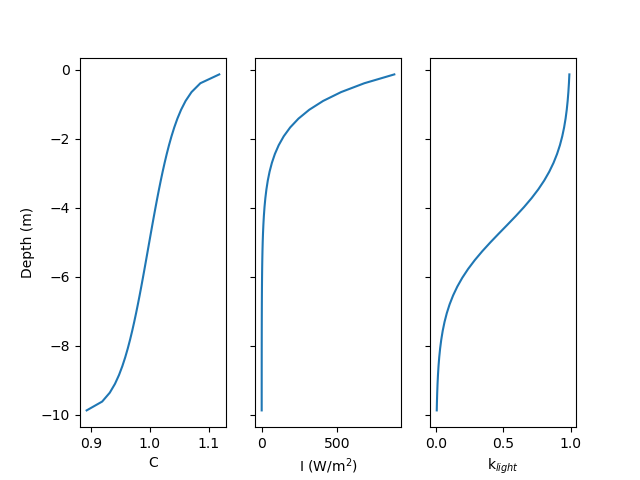

In [22]:
import numpy as np
def ideal_gp(H,ustar,w,Isat,I0=1000, Kd=1.0, plot=False, g_max=0.6):
    # Rouse profile:
    b=w/(0.4*ustar)
    # Full eq: ca * ( (H-za)/za * z/(H-z) )**-b
    # since I want to normalize to depth-integrated mass, ignore all constants...
    # take z as positive down from the surface. This puts greatest concentrations
    # near the surface.
    zi=np.linspace(0,H,40)
    z=0.5*(zi[:-1] + zi[1:]) # centers of "cells"
    C = (z/(H-z) )**-b
    C /= C.mean()

    I = I0*np.exp(-Kd*z)
    kLight = I/(I+Isat)
    
    if plot:
        fig,(axC,axI,axk)=plt.subplots(1,3,sharey=True)
        axC.plot(C,-z)
        axC.set_xlabel('C')
        axI.plot(I,-z)
        axI.set_xlabel('I (W/m$^2$)')
        axC.set_ylabel('Depth (m)')
        axk.plot(kLight,-z)
        axk.set_xlabel('k$_{light}$')

    gp = (g_max * kLight * C).sum() / C.sum()
    return gp
ideal_gp(10,np.sqrt(0.0005)*0.5,10.0/86400,10,plot=True)

Text(0.03, 0.03, 'H=10 u=0.4')

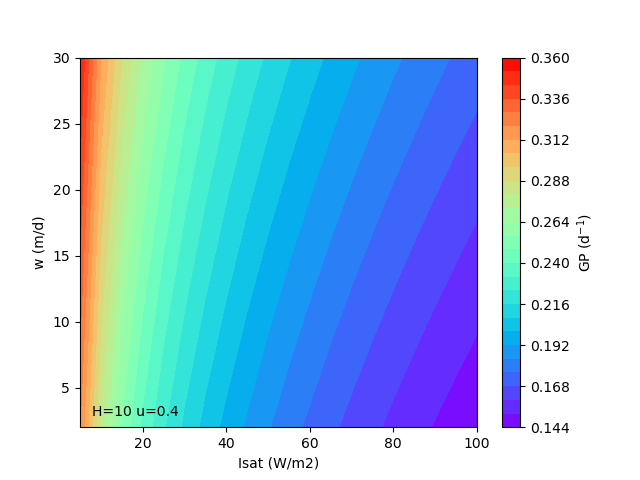

In [36]:
# Curious about Isat vs. w
Isats=np.linspace(5,100,20)
ws = np.linspace(2.0,30.0,20)

II,WW = np.meshgrid(Isats,ws)
GP = np.zeros_like(II)

H=10
utide=0.4
Cd=0.0005
for idx in np.ndindex(II.shape):
    GP[idx] = ideal_gp(H=H,ustar=np.sqrt(0.0005)*utide,
                       w=WW[idx]/86400, Isat=II[idx])

fig,ax=plt.subplots()
#coll=ax.pcolormesh(II,WW,GP,shading='nearest',cmap='rainbow')
coll=ax.contourf(II,WW,GP,30,cmap='rainbow')
plt.colorbar(coll,label="GP (d$^{-1}$)")
ax.set_xlabel("Isat (W/m2)")
ax.set_ylabel("w (m/d)")
ax.text(0.03,0.03,f"H={H} u={utide}",transform=ax.transAxes)

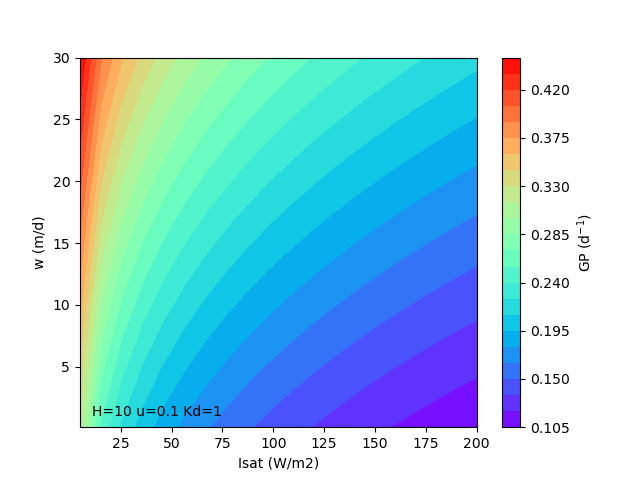

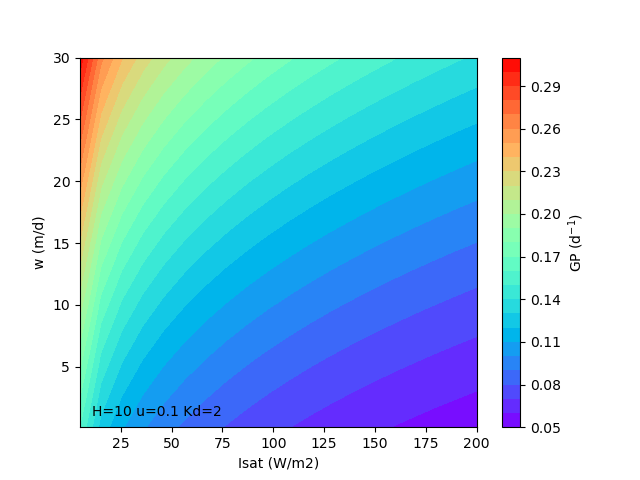

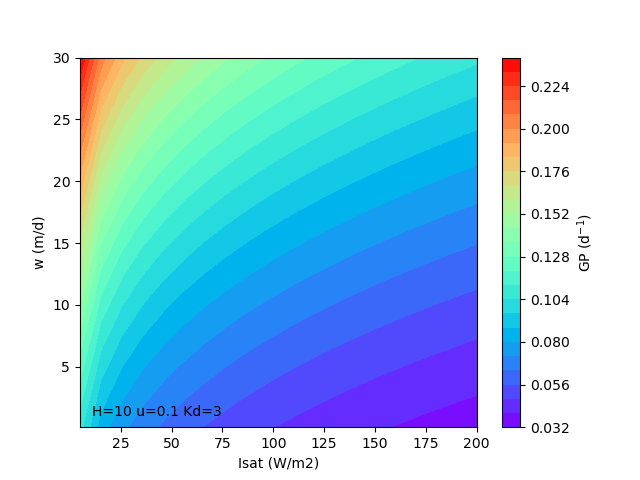

In [44]:
# Curious about Isat vs. w
Isats=np.linspace(5,200,20)
ws = np.linspace(0.1,30.0,20)

II,WW = np.meshgrid(Isats,ws)
GP = np.zeros_like(II)

H=10
utide=0.1
for Kd in [1,2,3]:
    Cd=0.0005
    for idx in np.ndindex(II.shape):
        GP[idx] = ideal_gp(H=H,ustar=np.sqrt(0.0005)*utide,
                           w=WW[idx]/86400, Isat=II[idx], Kd=Kd)
    
    fig,ax=plt.subplots()
    #coll=ax.pcolormesh(II,WW,GP,shading='nearest',cmap='rainbow')
    coll=ax.contourf(II,WW,GP,30,cmap='rainbow')
    plt.colorbar(coll,label="GP (d$^{-1}$)")
    ax.set_xlabel("Isat (W/m2)")
    ax.set_ylabel("w (m/d)")
    ax.text(0.03,0.03,f"H={H} u={utide} Kd={Kd}",transform=ax.transAxes)

In [ ]:
# Curious about Isat vs. Kd
Isats=np.linspace(5,200,20)
ws = 10.
Kd = np.linspace(0.8,3.2,20)

II,WW = np.meshgrid(Isats,ws)
GP = np.zeros_like(II)

H=10
utide=0.2
for Kd in [1,2,3]:
    Cd=0.0005
    for idx in np.ndindex(II.shape):
        GP[idx] = ideal_gp(H=H,ustar=np.sqrt(0.0005)*utide,
                           w=ws/86400, Isat=II[idx], Kd=Kd[idx])
    
    fig,ax=plt.subplots()
    #coll=ax.pcolormesh(II,WW,GP,shading='nearest',cmap='rainbow')
    coll=ax.contourf(II,WW,GP,30,cmap='rainbow')
    plt.colorbar(coll,label="GP (d$^{-1}$)")
    ax.set_xlabel("Isat (W/m2)")
    ax.set_ylabel("w (m/d)")
    ax.text(0.03,0.03,f"H={H} u={utide} Kd={Kd}",transform=ax.transAxes)

Text(0.03, 0.03, 'H=10 w=10.0')

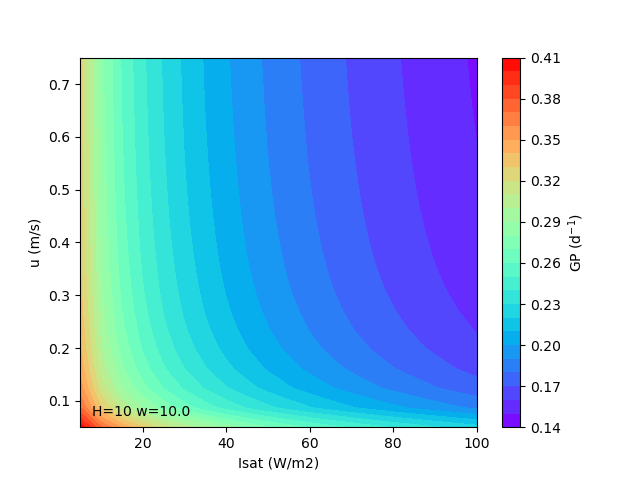

In [38]:
# Curious about Isat vs. ustar
Isats=np.linspace(5,100,20)
U=np.linspace(0.05,0.75,20)
ws = 10.0

II,UU = np.meshgrid(Isats,U)
GP = np.zeros_like(II)

H=10
Cd=0.0005
for idx in np.ndindex(II.shape):
    GP[idx] = ideal_gp(H=H,ustar=np.sqrt(0.0005)*UU[idx],
                       w=ws/86400, Isat=II[idx])

fig,ax=plt.subplots()
coll=ax.contourf(II,UU,GP,30,cmap='rainbow')
plt.colorbar(coll,label="GP (d$^{-1}$)")
ax.set_xlabel("Isat (W/m2)")
ax.set_ylabel("u (m/s)")
ax.text(0.03,0.03,f"H={H} w={ws}",transform=ax.transAxes)

Text(0.03, 0.03, 'H=10 w=10.0')

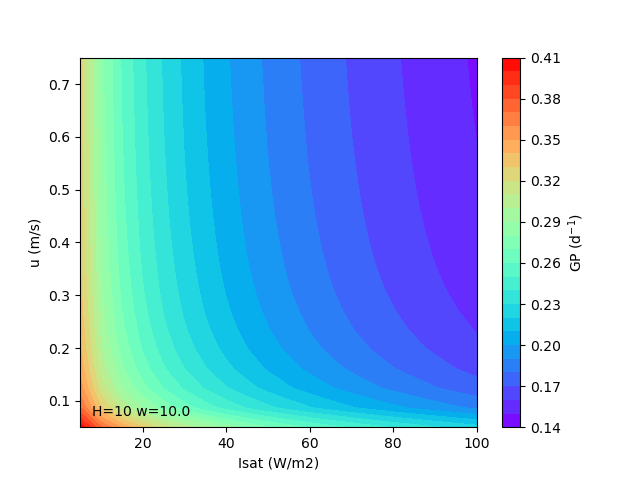

In [39]:
# Curious about Isat vs. ustar
Isats=np.linspace(5,100,20)
U=np.linspace(0.05,0.75,20)
ws = 10.0

II,UU = np.meshgrid(Isats,U)
GP = np.zeros_like(II)

H=10
Cd=0.0005
for idx in np.ndindex(II.shape):
    GP[idx] = ideal_gp(H=H,ustar=np.sqrt(0.0005)*UU[idx],
                       w=ws/86400, Isat=II[idx])

fig,ax=plt.subplots()
coll=ax.contourf(II,UU,GP,30,cmap='rainbow')
plt.colorbar(coll,label="GP (d$^{-1}$)")
ax.set_xlabel("Isat (W/m2)")
ax.set_ylabel("u (m/s)")
ax.text(0.03,0.03,f"H={H} w={ws}",transform=ax.transAxes)